In [1]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [44]:
import requests
from multiprocessing.pool import ThreadPool as Pool

sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://pyviz-tutorial.readthedocs.io/de/latest/', 32709)
('https://jupyter-tutorial.readthedocs.io/en/latest/', 78543)
('https://cusy.io/en', 30232)
('https://github.com/veit/pyviz-tutorial/', 194571)
('https://github.com/veit/jupyter-tutorial/', 228424)


In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9,10.1])
Y_label=np.array(['A','C','A','A','B','A','B','A','C','A'])
start_time = time.perf_counter()
utils.downsamplingByLabel(X,Y,Y_label,0.8,'A',True)
finish_time = time.perf_counter()
print("Program finished in {} seconds - using serial".format(finish_time-start_time))

DEBUGING
lenFilter 6
r_times 4
irandom  2
index  2
SI
irandom  3
index  4
SI
irandom  2
index  5
SI
irandom  0
index  4
NO, segundo intento
index  4
NO
Program finished in 0.0008859999999994983 seconds - using serial


In [3]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [6]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [7]:
len(array_Xtrain)

4251565

In [8]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

4251565

In [10]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

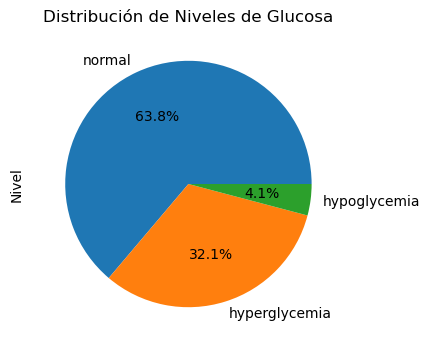

In [11]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [12]:
df_Y_scaled['Nivel'].value_counts()

normal           2713056
hyperglycemia    1363668
hypoglycemia      174841
Name: Nivel, dtype: int64

In [13]:
df_Y_scaled

,Glucose level,Nivel
0,203.0,hyperglycemia
1,197.0,hyperglycemia
2,205.0,hyperglycemia
3,209.0,hyperglycemia
4,204.0,hyperglycemia
...,...,...
4251560,171.0,normal
4251561,176.0,normal
4251562,181.0,hyperglycemia
4251563,188.0,hyperglycemia


In [14]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [15]:
print(len(XP[2]))

42516


In [16]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.8,'normal',False)

In [17]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [18]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 18545
Program finished in 29.010584700000003 seconds - using multiprocessing
1 35624
Program finished in 30.740319599999992 seconds - using multiprocessing
2 52362
Program finished in 30.023697099999993 seconds - using multiprocessing
3 70932
Program finished in 31.74633540000002 seconds - using multiprocessing
4 86552
Program finished in 31.247268899999995 seconds - using multiprocessing
5 102186
Program finished in 31.256250300000005 seconds - using multiprocessing
6 126197
Program finished in 23.780033000000003 seconds - using multiprocessing
7 153834
Program finished in 21.108592399999964 seconds - using multiprocessing
8 181229
Program finished in 22.11221710000001 seconds - using multiprocessing
9 210705
Program finished in 18.326855800000033 seconds - using multiprocessing
10 237790
Program finished in 20.88574079999995 seconds - using multiprocessing
11 262589
Program finished in 24.776032199999975 seconds - using multiprocessing
12 286589
Program finished in 27.3238397000000

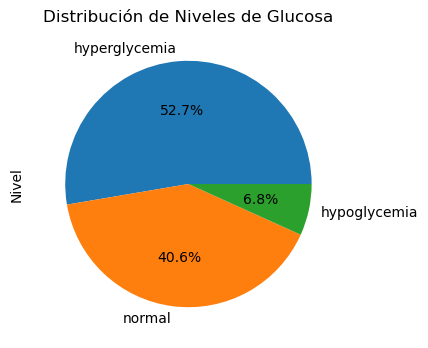

In [19]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [20]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1363668
normal           1050190
hypoglycemia      174841
Name: Nivel, dtype: int64

<AxesSubplot:>

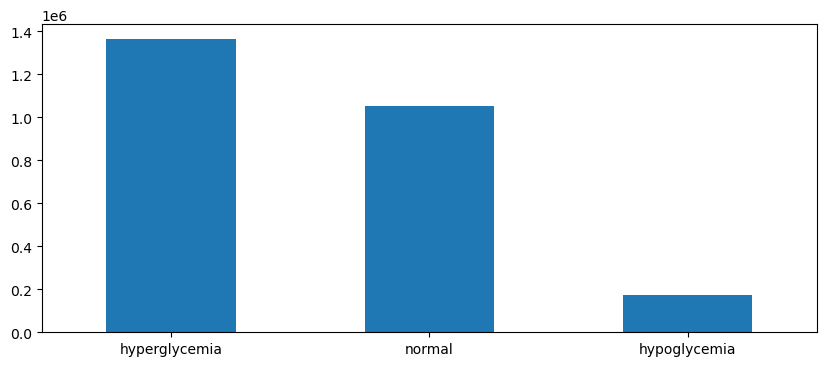

In [21]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [22]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [23]:
len(XNew)

2588699

In [24]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [25]:
len(YNew)

2588699

In [26]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

25887


In [36]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 18740
Program finished in 7.408943800000998 seconds - using multiprocessing
1 35898
Program finished in 7.687761099999989 seconds - using multiprocessing
2 53637
Program finished in 8.07323340000039 seconds - using multiprocessing
3 68730
Program finished in 10.146381700000347 seconds - using multiprocessing
4 90750
Program finished in 4.547578699999576 seconds - using multiprocessing
5 113822
Program finished in 3.1319736000004923 seconds - using multiprocessing
6 137201
Program finished in 3.1811233999997057 seconds - using multiprocessing
7 160969
Program finished in 3.143270200000188 seconds - using multiprocessing
8 184179
Program finished in 3.744942599998467 seconds - using multiprocessing
9 206310
Program finished in 4.822896300000139 seconds - using multiprocessing
10 228739
Program finished in 4.217051199999332 seconds - using multiprocessing
11 252149
Program finished in 3.965053699999771 seconds - using multiprocessing
12 275353
Program finished in 4.238132200000109 secon

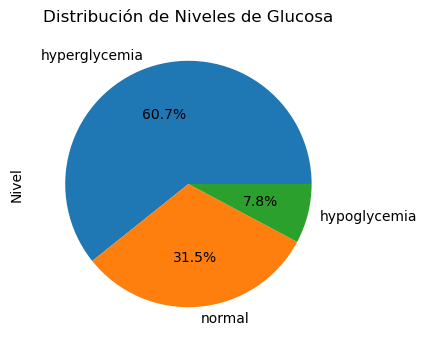

In [37]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [38]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1363668
normal            706620
hypoglycemia      174841
Name: Nivel, dtype: int64

In [39]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

22452


In [40]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 21412
Program finished in 1.2878051999996387 seconds - using multiprocessing
1 41748
Program finished in 3.225022099999478 seconds - using multiprocessing
2 63588
Program finished in 1.190479900000355 seconds - using multiprocessing
3 82620
Program finished in 4.288161700000273 seconds - using multiprocessing
4 101345
Program finished in 4.3476654999994935 seconds - using multiprocessing
5 119601
Program finished in 4.895023099999889 seconds - using multiprocessing
6 137583
Program finished in 5.688877300000968 seconds - using multiprocessing
7 155043
Program finished in 5.1997840000003634 seconds - using multiprocessing
8 173286
Program finished in 4.894060000000536 seconds - using multiprocessing
9 190786
Program finished in 6.024614899999506 seconds - using multiprocessing
10 207506
Program finished in 5.924068199999965 seconds - using multiprocessing
11 225167
Program finished in 5.707654200001343 seconds - using multiprocessing
12 243530
Program finished in 5.651726500000223 sec

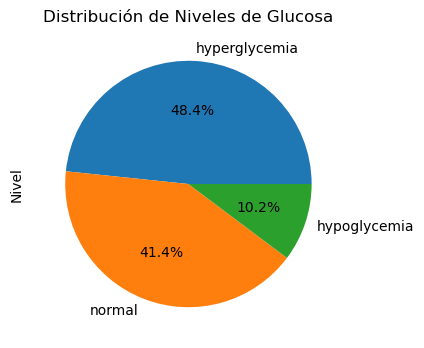

In [41]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    825217
normal           706620
hypoglycemia     174841
Name: Nivel, dtype: int64

In [43]:
with open('dataset/generado/dataset15min/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [44]:
with open('dataset/generado/dataset15min/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [45]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

17067
0 13191
Program finished in 3.5150459999986197 seconds - using multiprocessing
1 25663
Program finished in 3.967710500000976 seconds - using multiprocessing
2 37891
Program finished in 4.29090609999912 seconds - using multiprocessing
3 49701
Program finished in 4.305577899998752 seconds - using multiprocessing
4 64424
Program finished in 2.2320478999990883 seconds - using multiprocessing
5 79721
Program finished in 1.766540200000236 seconds - using multiprocessing
6 94901
Program finished in 1.8751545999984955 seconds - using multiprocessing
7 110512
Program finished in 1.9517618000008952 seconds - using multiprocessing
8 125514
Program finished in 2.7821115999995527 seconds - using multiprocessing
9 140365
Program finished in 2.756311099999948 seconds - using multiprocessing
10 155207
Program finished in 2.39242109999941 seconds - using multiprocessing
11 169836
Program finished in 2.4162664000014047 seconds - using multiprocessing
12 184746
Program finished in 2.390261099999406

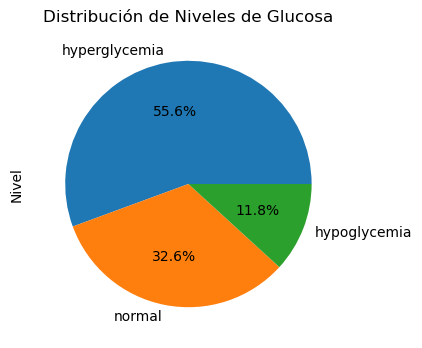

In [46]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [47]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    825217
normal           483920
hypoglycemia     174841
Name: Nivel, dtype: int64

In [48]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

14840
0 14064
Program finished in 1.2898081000003003 seconds - using multiprocessing
1 27876
Program finished in 1.1847316999992472 seconds - using multiprocessing
2 41689
Program finished in 1.2677063999999518 seconds - using multiprocessing
3 54837
Program finished in 1.6661999999996624 seconds - using multiprocessing
4 67479
Program finished in 2.0992201999997633 seconds - using multiprocessing
5 79854
Program finished in 2.28458689999934 seconds - using multiprocessing
6 91888
Program finished in 2.9141046999993705 seconds - using multiprocessing
7 104007
Program finished in 3.0029500000000553 seconds - using multiprocessing
8 116425
Program finished in 2.8238562000005913 seconds - using multiprocessing
9 128473
Program finished in 2.9978328999986843 seconds - using multiprocessing
10 140546
Program finished in 3.2847053999994387 seconds - using multiprocessing
11 151793
Program finished in 3.597314300001017 seconds - using multiprocessing
12 163861
Program finished in 3.4090153999

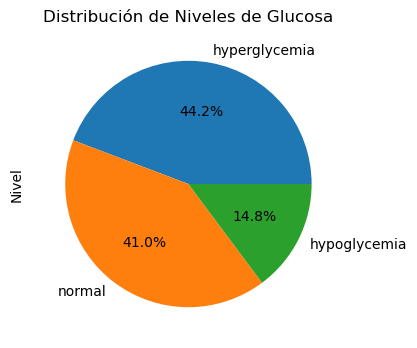

In [49]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [50]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    522274
normal           483920
hypoglycemia     174841
Name: Nivel, dtype: int64

In [51]:
with open('dataset/generado/dataset15min/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [52]:
with open('dataset/generado/dataset15min/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [53]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

11811
0 9904
Program finished in 1.5246557999998913 seconds - using multiprocessing
1 19160
Program finished in 1.4765814999991562 seconds - using multiprocessing
2 28122
Program finished in 1.807993999998871 seconds - using multiprocessing
3 37368
Program finished in 1.587696299999152 seconds - using multiprocessing
4 47910
Program finished in 0.8489294999999402 seconds - using multiprocessing
5 58340
Program finished in 0.9838052000013704 seconds - using multiprocessing
6 69086
Program finished in 0.8395325999990746 seconds - using multiprocessing
7 79665
Program finished in 0.9754345000001194 seconds - using multiprocessing
8 90381
Program finished in 0.93917970000075 seconds - using multiprocessing
9 100773
Program finished in 1.353572100000747 seconds - using multiprocessing
10 110943
Program finished in 1.5956416000008176 seconds - using multiprocessing
11 120836
Program finished in 1.904910799999925 seconds - using multiprocessing
12 131311
Program finished in 1.7820414999987406

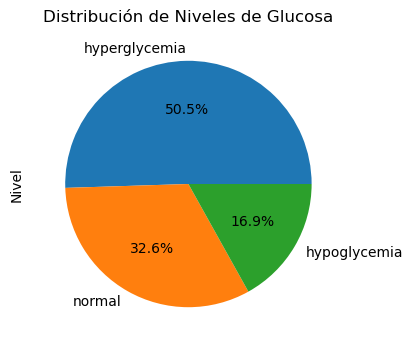

In [54]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [55]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    522274
normal           336999
hypoglycemia     174841
Name: Nivel, dtype: int64

In [56]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

10342
0 9846
Program finished in 0.813723299999765 seconds - using multiprocessing
1 19562
Program finished in 0.6554034000000684 seconds - using multiprocessing
2 29066
Program finished in 0.9847642000004271 seconds - using multiprocessing
3 38380
Program finished in 0.7910171000003174 seconds - using multiprocessing
4 47599
Program finished in 0.9622931000012613 seconds - using multiprocessing
5 56439
Program finished in 1.3228187000004255 seconds - using multiprocessing
6 65348
Program finished in 1.157345499999792 seconds - using multiprocessing
7 74070
Program finished in 1.3089540999990277 seconds - using multiprocessing
8 82961
Program finished in 1.2283912999992026 seconds - using multiprocessing
9 91847
Program finished in 1.4167801000003237 seconds - using multiprocessing
10 100125
Program finished in 1.6542946999998094 seconds - using multiprocessing
11 108332
Program finished in 1.8059014999998908 seconds - using multiprocessing
12 116949
Program finished in 1.4430138999996

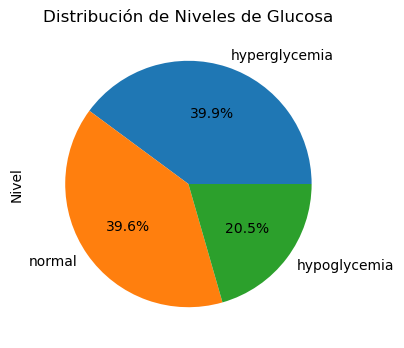

In [57]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [58]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    339372
normal           336999
hypoglycemia     174841
Name: Nivel, dtype: int64

In [59]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [60]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

In [64]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'rb') as f:
    XNew = np.load(f)

In [67]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'rb') as f:
    YNew = np.load(f)

In [69]:
len(array_Ytrain_label3)

851212

In [70]:
array_Xtrain3=XNew
array_Ytrain3=YNew
#array_Ytrain_label3=YnewLabel
N=100
XP=np.array_split(array_Xtrain3, N) 
YP=np.array_split(array_Ytrain3, N)
Y_labelP=np.array_split( array_Ytrain_label3, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

8513
0 7504
Program finished in 0.5818681999990076 seconds - using multiprocessing
1 14661
Program finished in 0.6043554999996559 seconds - using multiprocessing
2 21287
Program finished in 0.7543009000000893 seconds - using multiprocessing
3 28278
Program finished in 0.7174448000005214 seconds - using multiprocessing
4 35405
Program finished in 0.7305405999995855 seconds - using multiprocessing
5 43111
Program finished in 0.74738570000045 seconds - using multiprocessing
6 50950
Program finished in 0.7761360000004061 seconds - using multiprocessing
7 58470
Program finished in 1.170708800000284 seconds - using multiprocessing
8 66389
Program finished in 1.076487199999974 seconds - using multiprocessing
9 74176
Program finished in 1.1640827999999601 seconds - using multiprocessing
10 81586
Program finished in 1.261377699998775 seconds - using multiprocessing
11 89050
Program finished in 1.3935404000003473 seconds - using multiprocessing
12 96150
Program finished in 1.8816533999997773 sec

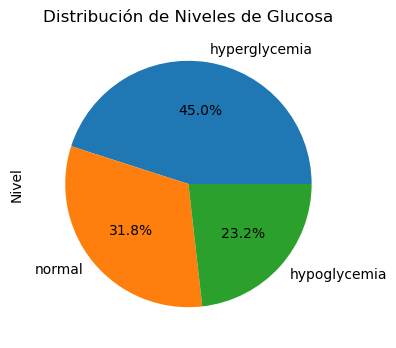

In [71]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [72]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    339372
normal           239281
hypoglycemia     174841
Name: Nivel, dtype: int64

In [73]:
array_Xtrain3=XNew
array_Ytrain3=YNew
array_Ytrain_label3=YnewLabel
N=100
XP=np.array_split(array_Xtrain3, N) 
YP=np.array_split(array_Ytrain3, N)
Y_labelP=np.array_split( array_Ytrain_label3, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

7535
0 7097
Program finished in 0.1947957000011229 seconds - using multiprocessing
1 14172
Program finished in 0.14924080000128015 seconds - using multiprocessing
2 20809
Program finished in 0.22383949999857577 seconds - using multiprocessing
3 27669
Program finished in 0.22321690000171657 seconds - using multiprocessing
4 34564
Program finished in 0.2749199999998382 seconds - using multiprocessing
5 41106
Program finished in 0.4329507000002195 seconds - using multiprocessing
6 47921
Program finished in 0.4119116000001668 seconds - using multiprocessing
7 54682
Program finished in 0.4460810999989917 seconds - using multiprocessing
8 61378
Program finished in 0.5224182000019937 seconds - using multiprocessing
9 68136
Program finished in 0.5765466000011656 seconds - using multiprocessing
10 74443
Program finished in 0.680710700002237 seconds - using multiprocessing
11 80777
Program finished in 0.5954760000022361 seconds - using multiprocessing
12 87196
Program finished in 0.6555946000007

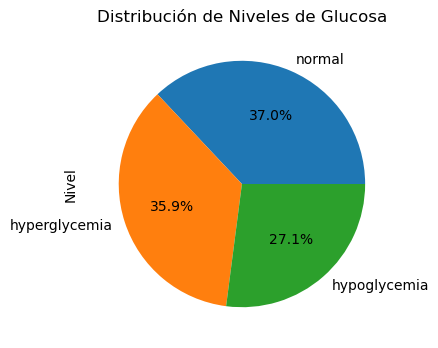

In [74]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [75]:
df_Y_scaled['Nivel'].value_counts()

normal           239281
hyperglycemia    232237
hypoglycemia     174841
Name: Nivel, dtype: int64

In [76]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'wb') as f:
    np.save(f, XNew)

In [77]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [126]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [127]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [128]:
len(array_Ytrain)

646359

In [129]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

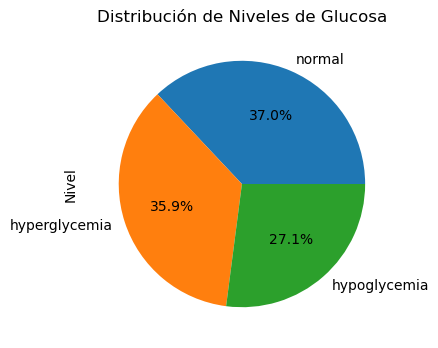

In [130]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [131]:
df_Y_scaled['Nivel'].value_counts()

normal           239281
hyperglycemia    232237
hypoglycemia     174841
Name: Nivel, dtype: int64

In [132]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [133]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [134]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.23,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 6201
Program finished in 0.09791799999948125 seconds - using multiprocessing
1 12371
Program finished in 0.06467170000541955 seconds - using multiprocessing
2 18486
Program finished in 0.09604650000255788 seconds - using multiprocessing
3 24466
Program finished in 0.13005469999916386 seconds - using multiprocessing
4 30494
Program finished in 0.1466011000011349 seconds - using multiprocessing
5 36486
Program finished in 0.17930920000071637 seconds - using multiprocessing
6 42438
Program finished in 0.22799289999966277 seconds - using multiprocessing
7 48498
Program finished in 0.26338160000159405 seconds - using multiprocessing
8 54482
Program finished in 0.24768809999659425 seconds - using multiprocessing
9 60467
Program finished in 0.4128759000013815 seconds - using multiprocessing
10 66405
Program finished in 0.39418100000330014 seconds - using multiprocessing
11 72274
Program finished in 0.33365839999896707 seconds - using multiprocessing
12 78163
Program finished in 0.3554376000

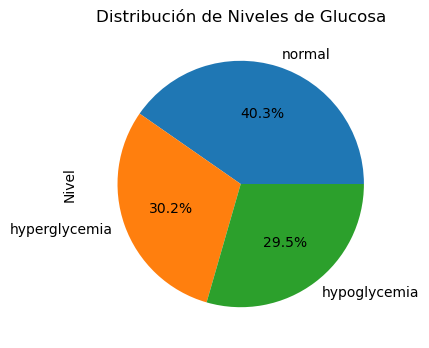

In [135]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [139]:
df_Y_scaled['Nivel'].value_counts()

normal           239281
hyperglycemia    179305
hypoglycemia     174841
Name: Nivel, dtype: int64

In [140]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.25,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 5389
Program finished in 0.08251659999950789 seconds - using multiprocessing
1 10626
Program finished in 0.09583540000312496 seconds - using multiprocessing
2 15830
Program finished in 0.12884810000105062 seconds - using multiprocessing
3 21084
Program finished in 0.13845410000067204 seconds - using multiprocessing
4 26329
Program finished in 0.1758830000035232 seconds - using multiprocessing
5 31790
Program finished in 0.18730649999633897 seconds - using multiprocessing
6 37236
Program finished in 0.20926860000326997 seconds - using multiprocessing
7 42676
Program finished in 0.28339640000194777 seconds - using multiprocessing
8 48161
Program finished in 0.25740349999978207 seconds - using multiprocessing
9 53526
Program finished in 0.2985631999981706 seconds - using multiprocessing
10 58893
Program finished in 0.3523762999975588 seconds - using multiprocessing
11 64230
Program finished in 0.3882517999954871 seconds - using multiprocessing
12 69477
Program finished in 0.450303199999

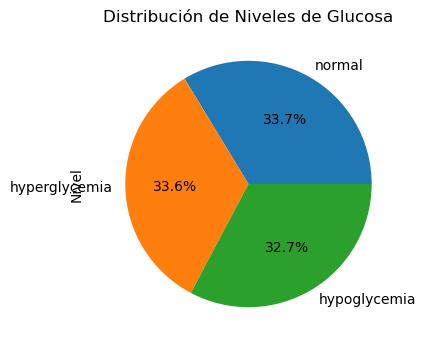

In [141]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [142]:
df_Y_scaled['Nivel'].value_counts()

normal           179826
hyperglycemia    179305
hypoglycemia     174841
Name: Nivel, dtype: int64

In [143]:
minClass

174841

In [144]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'hyperglycemia',False,minClass) 

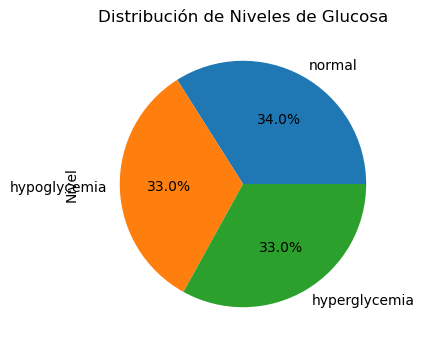

In [145]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [146]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'normal',False,minClass) 

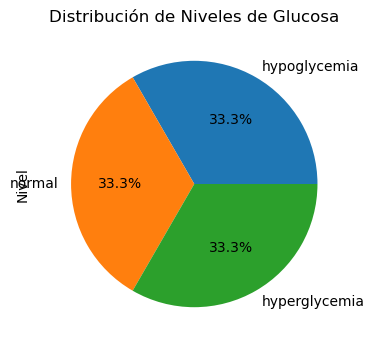

In [147]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

<AxesSubplot:>

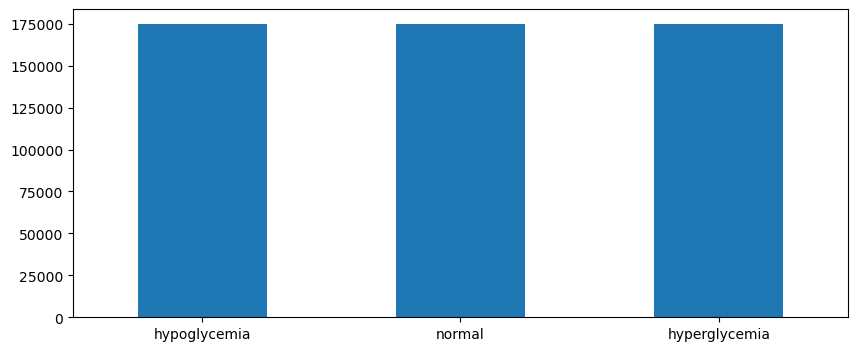

In [148]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [151]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     174841
normal           174841
hyperglycemia    174841
Name: Nivel, dtype: int64

In [149]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [150]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [168]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [169]:
len(array_Xval)

88575

In [170]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [171]:
len(array_Yval)

88575

In [172]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

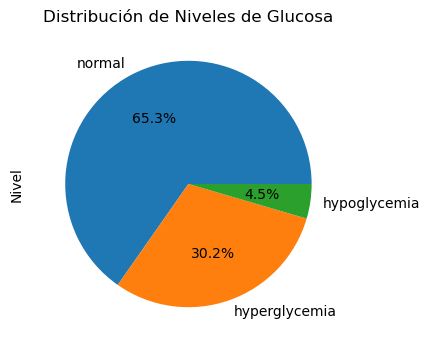

In [173]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [174]:
df_Yval_scaled['Nivel'].value_counts()

normal           57819
hyperglycemia    26745
hypoglycemia      4011
Name: Nivel, dtype: int64

In [175]:
N=100
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

886


In [176]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.95,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 323
Program finished in 0.039951300001121126 seconds - using multiprocessing
1 647
Program finished in 0.033000299998093396 seconds - using multiprocessing
2 1014
Program finished in 0.03034289999777684 seconds - using multiprocessing
3 1359
Program finished in 0.03398849999939557 seconds - using multiprocessing
4 1670
Program finished in 0.03694019999966258 seconds - using multiprocessing
5 2005
Program finished in 0.03765939999721013 seconds - using multiprocessing
6 2585
Program finished in 0.029666499998711515 seconds - using multiprocessing
7 3054
Program finished in 0.03975209999771323 seconds - using multiprocessing
8 3668
Program finished in 0.027950399999099318 seconds - using multiprocessing
9 4166
Program finished in 0.04627540000365116 seconds - using multiprocessing
10 4994
Program finished in 0.024595399998361245 seconds - using multiprocessing
11 5377
Program finished in 0.046097200000076555 seconds - using multiprocessing
12 5861
Program finished in 0.0419588000004296

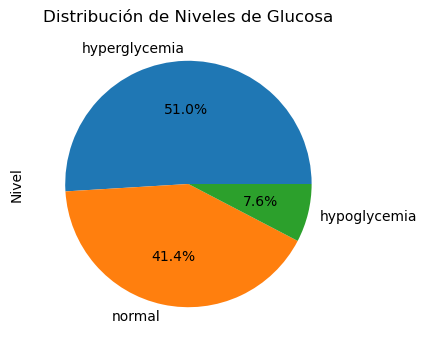

In [177]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [178]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    26745
normal           21728
hypoglycemia      4011
Name: Nivel, dtype: int64

In [179]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [180]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [181]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.95,'normal',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

525
0 200
Program finished in 0.0242459000000963 seconds - using multiprocessing
1 432
Program finished in 0.022882699995534495 seconds - using multiprocessing
2 661
Program finished in 0.02074709999578772 seconds - using multiprocessing
3 919
Program finished in 0.02031929999793647 seconds - using multiprocessing
4 1348
Program finished in 0.013728699996136129 seconds - using multiprocessing
5 1722
Program finished in 0.01800599999842234 seconds - using multiprocessing
6 2154
Program finished in 0.01675729999988107 seconds - using multiprocessing
7 2541
Program finished in 0.019351499999174848 seconds - using multiprocessing
8 3066
Program finished in 0.015238799998769537 seconds - using multiprocessing
9 3443
Program finished in 0.02170079999632435 seconds - using multiprocessing
10 3841
Program finished in 0.02719690000230912 seconds - using multiprocessing
11 4235
Program finished in 0.02769329999864567 seconds - using multiprocessing
12 4659
Program finished in 0.02527220000047236

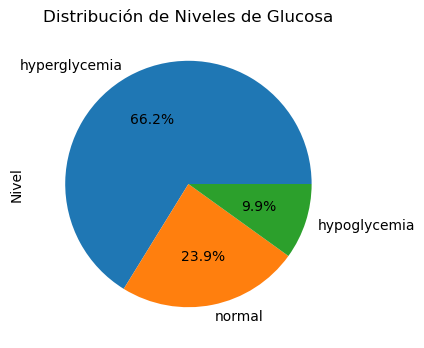

In [182]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [183]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    26745
normal            9642
hypoglycemia      4011
Name: Nivel, dtype: int64

In [184]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.95,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

404
0 375
Program finished in 0.014261299998906907 seconds - using multiprocessing
1 730
Program finished in 0.007648699996934738 seconds - using multiprocessing
2 988
Program finished in 0.01363860000128625 seconds - using multiprocessing
3 1222
Program finished in 0.017465100005210843 seconds - using multiprocessing
4 1464
Program finished in 0.025203099998179823 seconds - using multiprocessing
5 1709
Program finished in 0.01920169999357313 seconds - using multiprocessing
6 2088
Program finished in 0.013206399999035057 seconds - using multiprocessing
7 2492
Program finished in 0.013801499997498468 seconds - using multiprocessing
8 2787
Program finished in 0.018583699995360803 seconds - using multiprocessing
9 2985
Program finished in 0.025959000005968846 seconds - using multiprocessing
10 3194
Program finished in 0.02604550000251038 seconds - using multiprocessing
11 3400
Program finished in 0.025850400001218077 seconds - using multiprocessing
12 3625
Program finished in 0.0267189000

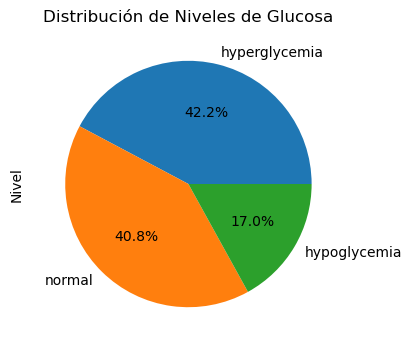

In [185]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [186]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    9982
normal           9642
hypoglycemia     4011
Name: Nivel, dtype: int64

In [187]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [188]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [189]:
len(XNew)

23635

<AxesSubplot:>

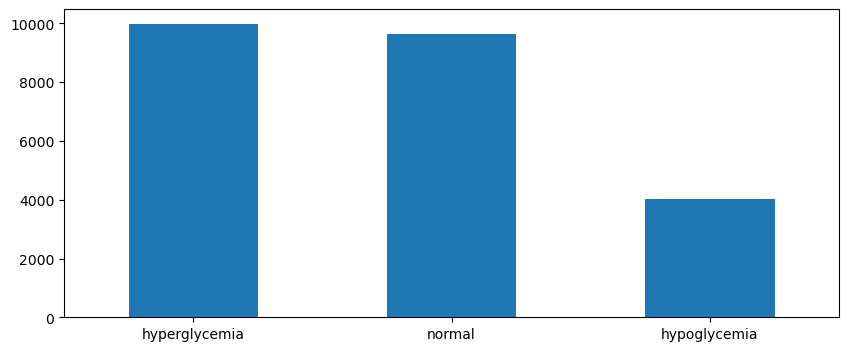

In [190]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

# Downsampling reduciendo hasta el total de la clase minoritaria

In [4]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'rb') as f:
    array_Xval = np.load(f)

In [5]:
len(array_Xval)

23635

In [6]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'rb') as f:
    array_Yval = np.load(f)

In [7]:
len(array_Yval)

23635

In [8]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

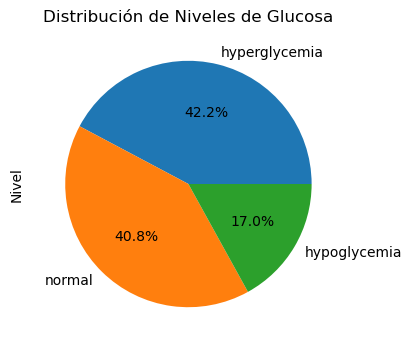

In [9]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [10]:
df_Yval_scaled['Nivel'].value_counts()

hyperglycemia    9982
normal           9642
hypoglycemia     4011
Name: Nivel, dtype: int64

In [11]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',True,4011) 

DEBUGING
lenFilter 9982
r_times 5971
irandom  0
index  0
NO, segundo intento
index  0
NO
irandom  1
index  2
NO, segundo intento
index  2
NO
irandom  1
index  4
NO, segundo intento
index  4
NO
irandom  3
index  8
NO, segundo intento
index  8
NO
irandom  1
index  10
NO, segundo intento
index  10
NO
irandom  3
index  14
NO, segundo intento
index  14
NO
irandom  0
index  15
NO, segundo intento
index  15
NO
irandom  2
index  18
NO, segundo intento
index  18
NO
irandom  0
index  19
NO, segundo intento
index  19
NO
irandom  1
index  21
NO, segundo intento
index  21
SI
irandom  2
index  24
NO, segundo intento
index  24
NO
irandom  0
index  25
NO, segundo intento
index  25
NO
irandom  0
index  26
NO, segundo intento
index  26
NO
irandom  2
index  29
NO, segundo intento
index  29
NO
irandom  1
index  31
NO, segundo intento
index  31
NO
irandom  3
index  35
NO, segundo intento
index  35
NO
irandom  3
index  39
NO, segundo intento
index  39
NO
irandom  1
index  41
NO, segundo intento
index  41
NO

irandom  3
index  504
NO, segundo intento
index  504
NO
irandom  0
index  505
NO, segundo intento
index  505
NO
irandom  2
index  508
NO, segundo intento
index  508
NO
irandom  1
index  510
SI
irandom  3
index  513
NO, segundo intento
index  513
NO
irandom  2
index  516
NO, segundo intento
index  516
NO
irandom  2
index  519
NO, segundo intento
index  519
NO
irandom  2
index  522
NO, segundo intento
index  522
NO
irandom  0
index  523
NO, segundo intento
index  523
NO
irandom  2
index  526
NO, segundo intento
index  526
NO
irandom  0
index  527
NO, segundo intento
index  527
NO
irandom  1
index  529
NO, segundo intento
index  529
NO
irandom  0
index  530
NO, segundo intento
index  530
SI
irandom  2
index  533
SI
irandom  3
index  536
NO, segundo intento
index  536
NO
irandom  1
index  538
NO, segundo intento
index  538
NO
irandom  3
index  542
NO, segundo intento
index  542
NO
irandom  0
index  543
NO, segundo intento
index  543
NO
irandom  1
index  545
NO, segundo intento
index  545
N

irandom  3
index  909
NO, segundo intento
index  909
NO
irandom  1
index  911
NO, segundo intento
index  911
NO
irandom  0
index  912
NO, segundo intento
index  912
NO
irandom  2
index  915
SI
irandom  2
index  917
NO, segundo intento
index  917
NO
irandom  0
index  918
NO, segundo intento
index  918
NO
irandom  2
index  921
NO, segundo intento
index  921
NO
irandom  3
index  925
NO, segundo intento
index  925
NO
irandom  3
index  929
NO, segundo intento
index  929
SI
irandom  1
index  931
SI
irandom  3
index  934
SI
irandom  3
index  937
SI
irandom  3
index  940
SI
irandom  3
index  943
SI
irandom  0
index  943
SI
irandom  2
index  945
SI
irandom  0
index  945
NO, segundo intento
index  945
NO
irandom  1
index  947
NO, segundo intento
index  947
NO
irandom  0
index  948
NO, segundo intento
index  948
NO
irandom  0
index  949
NO, segundo intento
index  949
NO
irandom  2
index  952
NO, segundo intento
index  952
NO
irandom  0
index  953
NO, segundo intento
index  953
NO
irandom  2
index

irandom  0
index  1301
SI
irandom  0
index  1301
NO, segundo intento
index  1301
NO
irandom  3
index  1305
NO, segundo intento
index  1305
NO
irandom  3
index  1309
NO, segundo intento
index  1309
NO
irandom  1
index  1311
NO, segundo intento
index  1311
SI
irandom  0
index  1312
NO, segundo intento
index  1312
NO
irandom  0
index  1313
NO, segundo intento
index  1313
NO
irandom  1
index  1315
NO, segundo intento
index  1315
NO
irandom  1
index  1317
NO, segundo intento
index  1317
NO
irandom  2
index  1320
NO, segundo intento
index  1320
NO
irandom  3
index  1324
NO, segundo intento
index  1324
NO
irandom  2
index  1327
NO, segundo intento
index  1327
NO
irandom  1
index  1329
NO, segundo intento
index  1329
NO
irandom  1
index  1331
NO, segundo intento
index  1331
NO
irandom  2
index  1334
NO, segundo intento
index  1334
NO
irandom  0
index  1335
NO, segundo intento
index  1335
NO
irandom  1
index  1337
NO, segundo intento
index  1337
NO
irandom  0
index  1338
NO, segundo intento
ind

irandom  2
index  1829
SI
irandom  3
index  1832
SI
irandom  3
index  1835
NO, segundo intento
index  1835
NO
irandom  2
index  1838
NO, segundo intento
index  1838
NO
irandom  0
index  1839
NO, segundo intento
index  1839
NO
irandom  0
index  1840
NO, segundo intento
index  1840
NO
irandom  3
index  1844
NO, segundo intento
index  1844
NO
irandom  2
index  1847
NO, segundo intento
index  1847
NO
irandom  1
index  1849
NO, segundo intento
index  1849
NO
irandom  1
index  1851
NO, segundo intento
index  1851
NO
irandom  3
index  1855
NO, segundo intento
index  1855
NO
irandom  0
index  1856
NO, segundo intento
index  1856
NO
irandom  3
index  1860
NO, segundo intento
index  1860
NO
irandom  3
index  1864
NO, segundo intento
index  1864
NO
irandom  0
index  1865
NO, segundo intento
index  1865
NO
irandom  1
index  1867
NO, segundo intento
index  1867
NO
irandom  0
index  1868
NO, segundo intento
index  1868
NO
irandom  0
index  1869
NO, segundo intento
index  1869
NO
irandom  0
index  18

irandom  3
index  2381
NO, segundo intento
index  2381
NO
irandom  3
index  2385
NO, segundo intento
index  2385
NO
irandom  0
index  2386
NO, segundo intento
index  2386
SI
irandom  1
index  2388
SI
irandom  1
index  2389
NO, segundo intento
index  2389
NO
irandom  0
index  2390
NO, segundo intento
index  2390
NO
irandom  3
index  2394
NO, segundo intento
index  2394
NO
irandom  3
index  2398
NO, segundo intento
index  2398
NO
irandom  1
index  2400
NO, segundo intento
index  2400
NO
irandom  2
index  2403
NO, segundo intento
index  2403
NO
irandom  1
index  2405
NO, segundo intento
index  2405
NO
irandom  3
index  2409
NO, segundo intento
index  2409
NO
irandom  2
index  2412
NO, segundo intento
index  2412
NO
irandom  1
index  2414
NO, segundo intento
index  2414
SI
irandom  0
index  2415
SI
irandom  2
index  2417
NO, segundo intento
index  2417
NO
irandom  1
index  2419
NO, segundo intento
index  2419
NO
irandom  0
index  2420
NO, segundo intento
index  2420
NO
irandom  2
index  24

irandom  2
index  2772
SI
irandom  1
index  2773
NO, segundo intento
index  2773
SI
irandom  1
index  2775
SI
irandom  0
index  2775
SI
irandom  0
index  2775
SI
irandom  0
index  2775
SI
irandom  2
index  2777
SI
irandom  3
index  2780
NO, segundo intento
index  2780
NO
irandom  2
index  2783
NO, segundo intento
index  2783
SI
irandom  0
index  2784
SI
irandom  3
index  2787
SI
irandom  3
index  2790
NO, segundo intento
index  2790
NO
irandom  1
index  2792
NO, segundo intento
index  2792
SI
irandom  0
index  2793
SI
irandom  0
index  2793
SI
irandom  2
index  2795
SI
irandom  0
index  2795
SI
irandom  0
index  2795
SI
irandom  3
index  2798
NO, segundo intento
index  2798
SI
irandom  1
index  2800
NO, segundo intento
index  2800
NO
irandom  3
index  2804
SI
irandom  3
index  2807
SI
irandom  2
index  2809
SI
irandom  2
index  2811
SI
irandom  2
index  2813
SI
irandom  3
index  2816
NO, segundo intento
index  2816
NO
irandom  1
index  2818
NO, segundo intento
index  2818
NO
irandom  2

irandom  0
index  3191
NO, segundo intento
index  3191
NO
irandom  2
index  3194
NO, segundo intento
index  3194
NO
irandom  0
index  3195
NO, segundo intento
index  3195
NO
irandom  0
index  3196
NO, segundo intento
index  3196
NO
irandom  3
index  3200
SI
irandom  1
index  3201
NO, segundo intento
index  3201
NO
irandom  2
index  3204
SI
irandom  1
index  3205
SI
irandom  1
index  3206
SI
irandom  1
index  3207
NO, segundo intento
index  3207
NO
irandom  3
index  3211
NO, segundo intento
index  3211
SI
irandom  1
index  3213
NO, segundo intento
index  3213
NO
irandom  1
index  3215
NO, segundo intento
index  3215
NO
irandom  3
index  3219
NO, segundo intento
index  3219
NO
irandom  0
index  3220
NO, segundo intento
index  3220
NO
irandom  2
index  3223
NO, segundo intento
index  3223
SI
irandom  0
index  3224
SI
irandom  0
index  3224
NO, segundo intento
index  3224
NO
irandom  3
index  3228
NO, segundo intento
index  3228
NO
irandom  0
index  3229
NO, segundo intento
index  3229
NO


irandom  3
index  3624
SI
irandom  3
index  3627
NO, segundo intento
index  3627
NO
irandom  0
index  3628
NO, segundo intento
index  3628
NO
irandom  1
index  3630
NO, segundo intento
index  3630
SI
irandom  1
index  3632
NO, segundo intento
index  3632
NO
irandom  0
index  3633
NO, segundo intento
index  3633
NO
irandom  0
index  3634
NO, segundo intento
index  3634
NO
irandom  2
index  3637
NO, segundo intento
index  3637
NO
irandom  0
index  3638
NO, segundo intento
index  3638
NO
irandom  2
index  3641
NO, segundo intento
index  3641
NO
irandom  0
index  3642
NO, segundo intento
index  3642
NO
irandom  2
index  3645
SI
irandom  3
index  3648
SI
irandom  1
index  3649
SI
irandom  1
index  3650
SI
irandom  3
index  3653
SI
irandom  1
index  3654
SI
irandom  0
index  3654
SI
irandom  3
index  3657
SI
irandom  2
index  3659
SI
irandom  0
index  3659
NO, segundo intento
index  3659
NO
irandom  1
index  3661
NO, segundo intento
index  3661
NO
irandom  1
index  3663
NO, segundo intento
i

irandom  3
index  3995
SI
irandom  2
index  3997
SI
irandom  3
index  4000
NO, segundo intento
index  4000
NO
irandom  0
index  4001
NO, segundo intento
index  4001
NO
irandom  0
index  4002
NO, segundo intento
index  4002
NO
irandom  2
index  4005
NO, segundo intento
index  4005
SI
irandom  2
index  4008
SI
irandom  2
index  4010
SI
irandom  0
index  4010
SI
irandom  0
index  4010
SI
irandom  3
index  4013
NO, segundo intento
index  4013
NO
irandom  1
index  4015
NO, segundo intento
index  4015
SI
irandom  2
index  4018
NO, segundo intento
index  4018
SI
irandom  1
index  4020
SI
irandom  0
index  4020
SI
irandom  1
index  4021
SI
irandom  0
index  4021
SI
irandom  2
index  4023
SI
irandom  2
index  4025
NO, segundo intento
index  4025
NO
irandom  2
index  4028
SI
irandom  3
index  4031
SI
irandom  1
index  4032
SI
irandom  3
index  4035
SI
irandom  3
index  4038
NO, segundo intento
index  4038
NO
irandom  2
index  4041
NO, segundo intento
index  4041
NO
irandom  2
index  4044
SI
iran

irandom  2
index  4448
SI
irandom  1
index  4449
SI
irandom  0
index  4449
SI
irandom  1
index  4450
SI
irandom  2
index  4452
SI
irandom  1
index  4453
SI
irandom  2
index  4455
SI
irandom  0
index  4455
SI
irandom  1
index  4456
SI
irandom  2
index  4458
SI
irandom  0
index  4458
SI
irandom  2
index  4460
NO, segundo intento
index  4460
NO
irandom  2
index  4463
SI
irandom  1
index  4464
SI
irandom  0
index  4464
SI
irandom  1
index  4465
SI
irandom  3
index  4468
SI
irandom  2
index  4470
SI
irandom  1
index  4471
NO, segundo intento
index  4471
NO
irandom  3
index  4475
SI
irandom  0
index  4475
SI
irandom  2
index  4477
SI
irandom  3
index  4480
SI
irandom  3
index  4483
SI
irandom  3
index  4486
NO, segundo intento
index  4486
NO
irandom  3
index  4490
NO, segundo intento
index  4490
NO
irandom  1
index  4492
NO, segundo intento
index  4492
NO
irandom  3
index  4496
NO, segundo intento
index  4496
NO
irandom  2
index  4499
NO, segundo intento
index  4499
NO
irandom  2
index  4502

irandom  1
index  4890
NO, segundo intento
index  4890
NO
irandom  1
index  4892
NO, segundo intento
index  4892
NO
irandom  0
index  4893
NO, segundo intento
index  4893
NO
irandom  0
index  4894
NO, segundo intento
index  4894
NO
irandom  2
index  4897
SI
irandom  3
index  4900
NO, segundo intento
index  4900
NO
irandom  0
index  4901
NO, segundo intento
index  4901
NO
irandom  3
index  4905
SI
irandom  1
index  4906
SI
irandom  3
index  4909
SI
irandom  3
index  4912
SI
irandom  0
index  4912
SI
irandom  1
index  4913
NO, segundo intento
index  4913
NO
irandom  3
index  4917
NO, segundo intento
index  4917
NO
irandom  0
index  4918
NO, segundo intento
index  4918
NO
irandom  2
index  4921
NO, segundo intento
index  4921
NO
irandom  1
index  4923
SI
irandom  1
index  4924
SI
irandom  3
index  4927
SI
irandom  0
index  4927
SI
irandom  2
index  4929
NO, segundo intento
index  4929
SI
irandom  2
index  4932
SI
irandom  1
index  4933
NO, segundo intento
index  4933
NO
irandom  0
index  

irandom  3
index  5300
NO, segundo intento
index  5300
NO
irandom  3
index  5304
SI
irandom  0
index  5304
SI
irandom  1
index  5305
SI
irandom  0
index  5305
SI
irandom  1
index  5306
NO, segundo intento
index  5306
NO
irandom  3
index  5310
NO, segundo intento
index  5310
NO
irandom  0
index  5311
NO, segundo intento
index  5311
NO
irandom  3
index  5315
NO, segundo intento
index  5315
NO
irandom  2
index  5318
NO, segundo intento
index  5318
NO
irandom  0
index  5319
NO, segundo intento
index  5319
NO
irandom  1
index  5321
NO, segundo intento
index  5321
NO
irandom  0
index  5322
NO, segundo intento
index  5322
NO
irandom  0
index  5323
NO, segundo intento
index  5323
NO
irandom  3
index  5327
SI
irandom  0
index  5327
SI
irandom  2
index  5329
NO, segundo intento
index  5329
SI
irandom  3
index  5333
SI
irandom  3
index  5336
SI
irandom  2
index  5338
SI
irandom  1
index  5339
NO, segundo intento
index  5339
NO
irandom  1
index  5341
NO, segundo intento
index  5341
SI
irandom  2
i

irandom  0
index  5663
NO, segundo intento
index  5663
NO
irandom  0
index  5664
NO, segundo intento
index  5664
SI
irandom  1
index  5666
SI
irandom  1
index  5667
SI
irandom  0
index  5667
SI
irandom  0
index  5667
SI
irandom  2
index  5669
NO, segundo intento
index  5669
NO
irandom  0
index  5670
NO, segundo intento
index  5670
NO
irandom  0
index  5671
NO, segundo intento
index  5671
SI
irandom  0
index  5672
NO, segundo intento
index  5672
NO
irandom  1
index  5674
NO, segundo intento
index  5674
NO
irandom  3
index  5678
NO, segundo intento
index  5678
NO
irandom  1
index  5680
NO, segundo intento
index  5680
NO
irandom  1
index  5682
NO, segundo intento
index  5682
NO
irandom  1
index  5684
NO, segundo intento
index  5684
NO
irandom  1
index  5686
SI
irandom  3
index  5689
SI
irandom  2
index  5691
NO, segundo intento
index  5691
NO
irandom  1
index  5693
SI
irandom  1
index  5694
SI
irandom  1
index  5695
SI
irandom  0
index  5695
NO, segundo intento
index  5695
SI
irandom  1
i

irandom  1
index  6072
SI
irandom  3
index  6075
NO, segundo intento
index  6075
NO
irandom  1
index  6077
NO, segundo intento
index  6077
NO
irandom  0
index  6078
NO, segundo intento
index  6078
NO
irandom  1
index  6080
NO, segundo intento
index  6080
NO
irandom  3
index  6084
SI
irandom  1
index  6085
SI
irandom  2
index  6087
SI
irandom  3
index  6090
SI
irandom  3
index  6093
SI
irandom  2
index  6095
SI
irandom  0
index  6095
SI
irandom  2
index  6097
SI
irandom  3
index  6100
SI
irandom  1
index  6101
NO, segundo intento
index  6101
NO
irandom  3
index  6105
SI
irandom  2
index  6107
SI
irandom  3
index  6110
NO, segundo intento
index  6110
NO
irandom  2
index  6113
NO, segundo intento
index  6113
SI
irandom  3
index  6117
SI
irandom  1
index  6118
SI
irandom  3
index  6121
SI
irandom  3
index  6124
SI
irandom  0
index  6124
SI
irandom  2
index  6126
SI
irandom  2
index  6128
SI
irandom  1
index  6129
SI
irandom  1
index  6130
SI
irandom  2
index  6132
SI
irandom  2
index  6134

irandom  2
index  6504
SI
irandom  2
index  6506
SI
irandom  2
index  6508
SI
irandom  2
index  6510
SI
irandom  1
index  6511
SI
irandom  2
index  6513
SI
irandom  1
index  6514
NO, segundo intento
index  6514
NO
irandom  2
index  6517
SI
irandom  0
index  6517
SI
irandom  0
index  6517
SI
irandom  1
index  6518
SI
irandom  2
index  6520
SI
irandom  2
index  6522
NO, segundo intento
index  6522
NO
irandom  1
index  6524
NO, segundo intento
index  6524
NO
irandom  1
index  6526
SI
irandom  0
index  6526
SI
irandom  1
index  6527
SI
irandom  1
index  6528
SI
irandom  1
index  6529
NO, segundo intento
index  6529
SI
irandom  3
index  6533
NO, segundo intento
index  6533
NO
irandom  1
index  6535
NO, segundo intento
index  6535
SI
irandom  2
index  6538
SI
irandom  0
index  6538
NO, segundo intento
index  6538
NO
irandom  3
index  6542
NO, segundo intento
index  6542
NO
irandom  0
index  6543
NO, segundo intento
index  6543
NO
irandom  0
index  6544
NO, segundo intento
index  6544
NO
iran

irandom  3
index  6957
NO, segundo intento
index  6957
NO
irandom  0
index  6958
NO, segundo intento
index  6958
NO
irandom  0
index  6959
NO, segundo intento
index  6959
NO
irandom  1
index  6961
NO, segundo intento
index  6961
NO
irandom  3
index  6965
NO, segundo intento
index  6965
SI
irandom  3
index  6969
SI
irandom  1
index  6970
SI
irandom  1
index  6971
SI
irandom  3
index  6974
SI
irandom  3
index  6977
SI
irandom  0
index  6977
SI
irandom  0
index  6977
SI
irandom  1
index  6978
SI
irandom  3
index  6981
SI
irandom  2
index  6983
SI
irandom  3
index  6986
NO, segundo intento
index  6986
NO
irandom  1
index  6988
NO, segundo intento
index  6988
SI
irandom  3
index  6992
NO, segundo intento
index  6992
NO
irandom  3
index  6996
SI
irandom  0
index  6996
SI
irandom  3
index  6999
SI
irandom  3
index  7002
NO, segundo intento
index  7002
NO
irandom  2
index  7005
NO, segundo intento
index  7005
NO
irandom  0
index  7006
NO, segundo intento
index  7006
NO
irandom  3
index  7010
S

irandom  1
index  7385
SI
irandom  3
index  7388
SI
irandom  1
index  7389
NO, segundo intento
index  7389
NO
irandom  1
index  7391
NO, segundo intento
index  7391
NO
irandom  1
index  7393
NO, segundo intento
index  7393
NO
irandom  0
index  7394
NO, segundo intento
index  7394
NO
irandom  2
index  7397
SI
irandom  3
index  7400
NO, segundo intento
index  7400
NO
irandom  3
index  7404
NO, segundo intento
index  7404
NO
irandom  1
index  7406
NO, segundo intento
index  7406
NO
irandom  1
index  7408
NO, segundo intento
index  7408
NO
irandom  2
index  7411
NO, segundo intento
index  7411
NO
irandom  2
index  7414
NO, segundo intento
index  7414
NO
irandom  2
index  7417
NO, segundo intento
index  7417
NO
irandom  1
index  7419
SI
irandom  0
index  7419
SI
irandom  3
index  7422
SI
irandom  2
index  7424
SI
irandom  2
index  7426
SI
irandom  1
index  7427
SI
irandom  1
index  7428
SI
irandom  0
index  7428
SI
irandom  3
index  7431
NO, segundo intento
index  7431
NO
irandom  3
index  

irandom  3
index  7770
NO, segundo intento
index  7770
NO
irandom  2
index  7773
NO, segundo intento
index  7773
NO
irandom  3
index  7777
SI
irandom  3
index  7780
SI
irandom  1
index  7781
NO, segundo intento
index  7781
NO
irandom  1
index  7783
NO, segundo intento
index  7783
NO
irandom  0
index  7784
NO, segundo intento
index  7784
NO
irandom  0
index  7785
NO, segundo intento
index  7785
SI
irandom  0
index  7786
NO, segundo intento
index  7786
NO
irandom  3
index  7790
NO, segundo intento
index  7790
NO
irandom  1
index  7792
NO, segundo intento
index  7792
NO
irandom  0
index  7793
NO, segundo intento
index  7793
NO
irandom  3
index  7797
SI
irandom  2
index  7799
SI
irandom  1
index  7800
SI
irandom  2
index  7802
NO, segundo intento
index  7802
NO
irandom  1
index  7804
NO, segundo intento
index  7804
NO
irandom  3
index  7808
NO, segundo intento
index  7808
NO
irandom  2
index  7811
NO, segundo intento
index  7811
NO
irandom  2
index  7814
NO, segundo intento
index  7814
NO


irandom  0
index  8184
SI
irandom  3
index  8187
SI
irandom  2
index  8189
SI
irandom  1
index  8190
NO, segundo intento
index  8190
NO
irandom  2
index  8193
NO, segundo intento
index  8193
SI
irandom  2
index  8196
SI
irandom  1
index  8197
SI
irandom  2
index  8199
NO, segundo intento
index  8199
SI
irandom  0
index  8200
SI
irandom  0
index  8200
SI
irandom  0
index  8200
SI
irandom  1
index  8201
SI
irandom  2
index  8203
NO, segundo intento
index  8203
NO
irandom  0
index  8204
NO, segundo intento
index  8204
NO
irandom  3
index  8208
SI
irandom  0
index  8208
NO, segundo intento
index  8208
NO
irandom  0
index  8209
NO, segundo intento
index  8209
NO
irandom  2
index  8212
NO, segundo intento
index  8212
SI
irandom  0
index  8213
NO, segundo intento
index  8213
SI
irandom  2
index  8216
SI
irandom  2
index  8218
SI
irandom  1
index  8219
SI
irandom  0
index  8219
SI
irandom  1
index  8220
SI
irandom  0
index  8220
SI
irandom  1
index  8221
SI
irandom  3
index  8224
NO, segundo i

irandom  0
index  8806
SI
irandom  3
index  8809
NO, segundo intento
index  8809
NO
irandom  0
index  8810
NO, segundo intento
index  8810
NO
irandom  3
index  8814
NO, segundo intento
index  8814
NO
irandom  2
index  8817
NO, segundo intento
index  8817
NO
irandom  3
index  8821
NO, segundo intento
index  8821
NO
irandom  0
index  8822
NO, segundo intento
index  8822
NO
irandom  3
index  8826
NO, segundo intento
index  8826
NO
irandom  0
index  8827
NO, segundo intento
index  8827
SI
irandom  2
index  8830
NO, segundo intento
index  8830
NO
irandom  3
index  8834
NO, segundo intento
index  8834
NO
irandom  0
index  8835
NO, segundo intento
index  8835
NO
irandom  3
index  8839
NO, segundo intento
index  8839
NO
irandom  0
index  8840
NO, segundo intento
index  8840
NO
irandom  1
index  8842
NO, segundo intento
index  8842
NO
irandom  0
index  8843
NO, segundo intento
index  8843
NO
irandom  3
index  8847
SI
irandom  2
index  8849
SI
irandom  3
index  8852
NO, segundo intento
index  88

irandom  0
index  9279
SI
irandom  0
index  9279
SI
irandom  0
index  9279
SI
irandom  1
index  9280
SI
irandom  3
index  9283
SI
irandom  3
index  9286
SI
irandom  1
index  9287
NO, segundo intento
index  9287
SI
irandom  1
index  9289
NO, segundo intento
index  9289
NO
irandom  0
index  9290
NO, segundo intento
index  9290
NO
irandom  3
index  9294
SI
irandom  0
index  9294
NO, segundo intento
index  9294
SI
irandom  0
index  9295
SI
irandom  3
index  9298
SI
irandom  1
index  9299
SI
irandom  1
index  9300
SI
irandom  0
index  9300
SI
irandom  2
index  9302
NO, segundo intento
index  9302
NO
irandom  3
index  9306
SI
irandom  3
index  9309
NO, segundo intento
index  9309
NO
irandom  3
index  9313
SI
irandom  0
index  9313
SI
irandom  0
index  9313
SI
irandom  3
index  9316
SI
irandom  2
index  9318
SI
irandom  3
index  9321
SI
irandom  0
index  9321
SI
irandom  2
index  9323
SI
irandom  3
index  9326
NO, segundo intento
index  9326
SI
irandom  3
index  9330
SI
irandom  1
index  9331

irandom  0
index  9759
SI
irandom  0
index  9759
NO, segundo intento
index  9759
NO
irandom  0
index  9760
NO, segundo intento
index  9760
NO
irandom  1
index  9762
SI
irandom  1
index  9763
SI
irandom  0
index  9763
SI
irandom  2
index  9765
NO, segundo intento
index  9765
NO
irandom  1
index  9767
NO, segundo intento
index  9767
NO
irandom  2
index  9770
NO, segundo intento
index  9770
NO
irandom  1
index  9772
NO, segundo intento
index  9772
NO
irandom  2
index  9775
NO, segundo intento
index  9775
NO
irandom  2
index  9778
NO, segundo intento
index  9778
NO
irandom  3
index  9782
SI
irandom  3
index  9785
SI
irandom  2
index  9787
NO, segundo intento
index  9787
NO
irandom  0
index  9788
NO, segundo intento
index  9788
NO
irandom  1
index  9790
NO, segundo intento
index  9790
NO
irandom  2
index  9793
NO, segundo intento
index  9793
NO
irandom  3
index  9797
NO, segundo intento
index  9797
NO
irandom  1
index  9799
NO, segundo intento
index  9799
NO
irandom  1
index  9801
NO, segun

irandom  1
index  10161
NO, segundo intento
index  10161
NO
irandom  3
index  10165
NO, segundo intento
index  10165
NO
irandom  1
index  10167
NO, segundo intento
index  10167
NO
irandom  1
index  10169
NO, segundo intento
index  10169
NO
irandom  2
index  10172
NO, segundo intento
index  10172
NO
irandom  0
index  10173
NO, segundo intento
index  10173
NO
irandom  3
index  10177
NO, segundo intento
index  10177
NO
irandom  3
index  10181
NO, segundo intento
index  10181
NO
irandom  1
index  10183
NO, segundo intento
index  10183
NO
irandom  2
index  10186
NO, segundo intento
index  10186
NO
irandom  0
index  10187
NO, segundo intento
index  10187
NO
irandom  3
index  10191
NO, segundo intento
index  10191
NO
irandom  3
index  10195
NO, segundo intento
index  10195
NO
irandom  2
index  10198
NO, segundo intento
index  10198
NO
irandom  0
index  10199
NO, segundo intento
index  10199
NO
irandom  1
index  10201
SI
irandom  1
index  10202
SI
irandom  0
index  10202
SI
irandom  1
index  1

irandom  2
index  10512
SI
irandom  1
index  10513
SI
irandom  3
index  10516
SI
irandom  2
index  10518
SI
irandom  0
index  10518
NO, segundo intento
index  10518
NO
irandom  1
index  10520
NO, segundo intento
index  10520
NO
irandom  3
index  10524
NO, segundo intento
index  10524
NO
irandom  1
index  10526
NO, segundo intento
index  10526
NO
irandom  1
index  10528
NO, segundo intento
index  10528
NO
irandom  3
index  10532
NO, segundo intento
index  10532
NO
irandom  2
index  10535
NO, segundo intento
index  10535
NO
irandom  1
index  10537
NO, segundo intento
index  10537
NO
irandom  2
index  10540
NO, segundo intento
index  10540
NO
irandom  3
index  10544
NO, segundo intento
index  10544
NO
irandom  0
index  10545
NO, segundo intento
index  10545
NO
irandom  0
index  10546
NO, segundo intento
index  10546
NO
irandom  3
index  10550
NO, segundo intento
index  10550
NO
irandom  3
index  10554
NO, segundo intento
index  10554
NO
irandom  1
index  10556
NO, segundo intento
index  1

irandom  0
index  10922
SI
irandom  0
index  10922
SI
irandom  3
index  10925
SI
irandom  1
index  10926
SI
irandom  2
index  10928
NO, segundo intento
index  10928
NO
irandom  0
index  10929
NO, segundo intento
index  10929
NO
irandom  0
index  10930
NO, segundo intento
index  10930
NO
irandom  3
index  10934
SI
irandom  0
index  10934
SI
irandom  0
index  10934
SI
irandom  1
index  10935
NO, segundo intento
index  10935
NO
irandom  3
index  10939
SI
irandom  0
index  10939
NO, segundo intento
index  10939
NO
irandom  2
index  10942
NO, segundo intento
index  10942
NO
irandom  2
index  10945
NO, segundo intento
index  10945
NO
irandom  2
index  10948
NO, segundo intento
index  10948
SI
irandom  0
index  10949
NO, segundo intento
index  10949
NO
irandom  1
index  10951
NO, segundo intento
index  10951
NO
irandom  3
index  10955
NO, segundo intento
index  10955
NO
irandom  3
index  10959
SI
irandom  0
index  10959
SI
irandom  3
index  10962
SI
irandom  0
index  10962
NO, segundo intento

irandom  3
index  11334
NO, segundo intento
index  11334
NO
irandom  1
index  11336
NO, segundo intento
index  11336
SI
irandom  0
index  11337
SI
irandom  3
index  11340
SI
irandom  1
index  11341
SI
irandom  1
index  11342
SI
irandom  1
index  11343
NO, segundo intento
index  11343
SI
irandom  2
index  11346
NO, segundo intento
index  11346
NO
irandom  1
index  11348
SI
irandom  3
index  11351
SI
irandom  1
index  11352
NO, segundo intento
index  11352
NO
irandom  1
index  11354
NO, segundo intento
index  11354
NO
irandom  3
index  11358
NO, segundo intento
index  11358
SI
irandom  0
index  11359
SI
irandom  0
index  11359
SI
irandom  0
index  11359
SI
irandom  2
index  11361
SI
irandom  2
index  11363
NO, segundo intento
index  11363
NO
irandom  0
index  11364
NO, segundo intento
index  11364
NO
irandom  2
index  11367
NO, segundo intento
index  11367
NO
irandom  3
index  11371
NO, segundo intento
index  11371
NO
irandom  3
index  11375
SI
irandom  3
index  11378
SI
irandom  1
index

irandom  2
index  11731
SI
irandom  0
index  11731
SI
irandom  3
index  11734
NO, segundo intento
index  11734
NO
irandom  2
index  11737
NO, segundo intento
index  11737
NO
irandom  1
index  11739
NO, segundo intento
index  11739
NO
irandom  1
index  11741
SI
irandom  1
index  11742
NO, segundo intento
index  11742
NO
irandom  0
index  11743
NO, segundo intento
index  11743
NO
irandom  0
index  11744
NO, segundo intento
index  11744
NO
irandom  3
index  11748
NO, segundo intento
index  11748
NO
irandom  3
index  11752
NO, segundo intento
index  11752
NO
irandom  0
index  11753
NO, segundo intento
index  11753
NO
irandom  0
index  11754
NO, segundo intento
index  11754
NO
irandom  3
index  11758
NO, segundo intento
index  11758
NO
irandom  2
index  11761
NO, segundo intento
index  11761
NO
irandom  0
index  11762
NO, segundo intento
index  11762
SI
irandom  1
index  11764
SI
irandom  1
index  11765
NO, segundo intento
index  11765
NO
irandom  1
index  11767
NO, segundo intento
index  1

irandom  1
index  12155
NO, segundo intento
index  12155
NO
irandom  3
index  12159
SI
irandom  3
index  12162
SI
irandom  2
index  12164
SI
irandom  2
index  12166
SI
irandom  0
index  12166
SI
irandom  2
index  12168
NO, segundo intento
index  12168
NO
irandom  3
index  12172
SI
irandom  2
index  12174
SI
irandom  1
index  12175
SI
irandom  3
index  12178
SI
irandom  0
index  12178
SI
irandom  1
index  12179
NO, segundo intento
index  12179
NO
irandom  1
index  12181
NO, segundo intento
index  12181
NO
irandom  1
index  12183
NO, segundo intento
index  12183
NO
irandom  3
index  12187
NO, segundo intento
index  12187
NO
irandom  0
index  12188
NO, segundo intento
index  12188
NO
irandom  0
index  12189
NO, segundo intento
index  12189
SI
irandom  1
index  12191
SI
irandom  0
index  12191
SI
irandom  3
index  12194
NO, segundo intento
index  12194
SI
irandom  0
index  12195
SI
irandom  0
index  12195
SI
irandom  3
index  12198
SI
irandom  3
index  12201
NO, segundo intento
index  1220

irandom  1
index  12591
NO, segundo intento
index  12591
NO
irandom  0
index  12592
NO, segundo intento
index  12592
NO
irandom  2
index  12595
NO, segundo intento
index  12595
NO
irandom  0
index  12596
NO, segundo intento
index  12596
NO
irandom  1
index  12598
NO, segundo intento
index  12598
SI
irandom  3
index  12602
SI
irandom  0
index  12602
SI
irandom  3
index  12605
NO, segundo intento
index  12605
SI
irandom  3
index  12609
SI
irandom  0
index  12609
SI
irandom  0
index  12609
SI
irandom  0
index  12609
SI
irandom  2
index  12611
NO, segundo intento
index  12611
SI
irandom  3
index  12615
NO, segundo intento
index  12615
NO
irandom  0
index  12616
NO, segundo intento
index  12616
NO
irandom  3
index  12620
SI
irandom  2
index  12622
SI
irandom  1
index  12623
SI
irandom  3
index  12626
SI
irandom  1
index  12627
SI
irandom  1
index  12628
SI
irandom  2
index  12630
NO, segundo intento
index  12630
NO
irandom  2
index  12633
NO, segundo intento
index  12633
NO
irandom  0
index

irandom  0
index  13055
SI
irandom  2
index  13057
NO, segundo intento
index  13057
NO
irandom  2
index  13060
SI
irandom  3
index  13063
SI
irandom  3
index  13066
SI
irandom  2
index  13068
NO, segundo intento
index  13068
NO
irandom  2
index  13071
NO, segundo intento
index  13071
NO
irandom  3
index  13075
SI
irandom  0
index  13075
SI
irandom  0
index  13075
SI
irandom  0
index  13075
SI
irandom  1
index  13076
SI
irandom  1
index  13077
SI
irandom  2
index  13079
SI
irandom  2
index  13081
SI
irandom  2
index  13083
NO, segundo intento
index  13083
NO
irandom  0
index  13084
NO, segundo intento
index  13084
NO
irandom  1
index  13086
SI
irandom  2
index  13088
SI
irandom  1
index  13089
SI
irandom  1
index  13090
SI
irandom  0
index  13090
SI
irandom  3
index  13093
NO, segundo intento
index  13093
NO
irandom  1
index  13095
NO, segundo intento
index  13095
SI
irandom  3
index  13099
SI
irandom  1
index  13100
SI
irandom  1
index  13101
SI
irandom  0
index  13101
SI
irandom  1
in

irandom  2
index  13433
SI
irandom  2
index  13435
SI
irandom  2
index  13437
SI
irandom  3
index  13440
NO, segundo intento
index  13440
NO
irandom  0
index  13441
NO, segundo intento
index  13441
NO
irandom  0
index  13442
NO, segundo intento
index  13442
NO
irandom  1
index  13444
SI
irandom  0
index  13444
NO, segundo intento
index  13444
NO
irandom  3
index  13448
SI
irandom  3
index  13451
NO, segundo intento
index  13451
SI
irandom  3
index  13455
NO, segundo intento
index  13455
SI
irandom  1
index  13457
SI
irandom  0
index  13457
SI
irandom  3
index  13460
SI
irandom  0
index  13460
SI
irandom  1
index  13461
SI
irandom  3
index  13464
NO, segundo intento
index  13464
NO
irandom  3
index  13468
NO, segundo intento
index  13468
SI
irandom  3
index  13472
NO, segundo intento
index  13472
NO
irandom  3
index  13476
SI
irandom  0
index  13476
SI
irandom  1
index  13477
SI
irandom  1
index  13478
SI
irandom  1
index  13479
NO, segundo intento
index  13479
NO
irandom  1
index  1348

irandom  1
index  13890
NO, segundo intento
index  13890
NO
irandom  1
index  13892
NO, segundo intento
index  13892
NO
irandom  0
index  13893
NO, segundo intento
index  13893
NO
irandom  0
index  13894
NO, segundo intento
index  13894
NO
irandom  3
index  13898
NO, segundo intento
index  13898
NO
irandom  3
index  13902
NO, segundo intento
index  13902
NO
irandom  3
index  13906
NO, segundo intento
index  13906
NO
irandom  2
index  13909
NO, segundo intento
index  13909
NO
irandom  1
index  13911
NO, segundo intento
index  13911
NO
irandom  0
index  13912
NO, segundo intento
index  13912
NO
irandom  2
index  13915
NO, segundo intento
index  13915
NO
irandom  0
index  13916
NO, segundo intento
index  13916
NO
irandom  0
index  13917
NO, segundo intento
index  13917
NO
irandom  0
index  13918
NO, segundo intento
index  13918
NO
irandom  0
index  13919
NO, segundo intento
index  13919
NO
irandom  2
index  13922
NO, segundo intento
index  13922
NO
irandom  0
index  13923
NO, segundo inte

irandom  0
index  14288
SI
irandom  2
index  14290
SI
irandom  2
index  14292
SI
irandom  3
index  14295
NO, segundo intento
index  14295
NO
irandom  2
index  14298
NO, segundo intento
index  14298
NO
irandom  3
index  14302
NO, segundo intento
index  14302
NO
irandom  2
index  14305
NO, segundo intento
index  14305
NO
irandom  0
index  14306
NO, segundo intento
index  14306
NO
irandom  3
index  14310
NO, segundo intento
index  14310
NO
irandom  2
index  14313
NO, segundo intento
index  14313
NO
irandom  0
index  14314
NO, segundo intento
index  14314
NO
irandom  2
index  14317
NO, segundo intento
index  14317
NO
irandom  0
index  14318
NO, segundo intento
index  14318
NO
irandom  1
index  14320
NO, segundo intento
index  14320
NO
irandom  1
index  14322
NO, segundo intento
index  14322
NO
irandom  3
index  14326
NO, segundo intento
index  14326
NO
irandom  3
index  14330
NO, segundo intento
index  14330
NO
irandom  0
index  14331
NO, segundo intento
index  14331
NO
irandom  0
index  1

irandom  0
index  14722
SI
irandom  3
index  14725
SI
irandom  1
index  14726
SI
irandom  3
index  14729
NO, segundo intento
index  14729
NO
irandom  0
index  14730
NO, segundo intento
index  14730
NO
irandom  3
index  14734
NO, segundo intento
index  14734
NO
irandom  0
index  14735
NO, segundo intento
index  14735
NO
irandom  2
index  14738
SI
irandom  1
index  14739
NO, segundo intento
index  14739
NO
irandom  3
index  14743
SI
irandom  3
index  14746
SI
irandom  1
index  14747
SI
irandom  2
index  14749
SI
irandom  3
index  14752
SI
irandom  0
index  14752
SI
irandom  3
index  14755
NO, segundo intento
index  14755
NO
irandom  2
index  14758
NO, segundo intento
index  14758
NO
irandom  1
index  14760
NO, segundo intento
index  14760
NO
irandom  1
index  14762
SI
irandom  2
index  14764
SI
irandom  1
index  14765
SI
irandom  1
index  14766
SI
irandom  0
index  14766
SI
irandom  2
index  14768
NO, segundo intento
index  14768
NO
irandom  3
index  14772
SI
irandom  0
index  14772
SI
i

irandom  3
index  15117
SI
irandom  1
index  15118
SI
irandom  2
index  15120
SI
irandom  1
index  15121
NO, segundo intento
index  15121
NO
irandom  0
index  15122
NO, segundo intento
index  15122
NO
irandom  2
index  15125
SI
irandom  3
index  15128
SI
irandom  0
index  15128
SI
irandom  1
index  15129
SI
irandom  1
index  15130
SI
irandom  3
index  15133
NO, segundo intento
index  15133
NO
irandom  3
index  15137
NO, segundo intento
index  15137
NO
irandom  2
index  15140
NO, segundo intento
index  15140
NO
irandom  3
index  15144
NO, segundo intento
index  15144
NO
irandom  1
index  15146
NO, segundo intento
index  15146
NO
irandom  0
index  15147
NO, segundo intento
index  15147
NO
irandom  2
index  15150
NO, segundo intento
index  15150
NO
irandom  2
index  15153
NO, segundo intento
index  15153
NO
irandom  2
index  15156
NO, segundo intento
index  15156
NO
irandom  1
index  15158
NO, segundo intento
index  15158
NO
irandom  3
index  15162
NO, segundo intento
index  15162
SI
iran

irandom  0
index  15558
SI
irandom  2
index  15560
SI
irandom  2
index  15562
SI
irandom  3
index  15565
SI
irandom  1
index  15566
SI
irandom  1
index  15567
NO, segundo intento
index  15567
NO
irandom  0
index  15568
NO, segundo intento
index  15568
NO
irandom  3
index  15572
SI
irandom  1
index  15573
NO, segundo intento
index  15573
NO
irandom  2
index  15576
NO, segundo intento
index  15576
SI
irandom  0
index  15577
SI
irandom  1
index  15578
SI
irandom  2
index  15580
SI
irandom  0
index  15580
SI
irandom  0
index  15580
SI
irandom  0
index  15580
SI
irandom  2
index  15582
SI
irandom  3
index  15585
SI
irandom  2
index  15587
NO, segundo intento
index  15587
NO
irandom  3
index  15591
NO, segundo intento
index  15591
NO
irandom  0
index  15592
NO, segundo intento
index  15592
NO
irandom  1
index  15594
SI
irandom  3
index  15597
SI
irandom  2
index  15599
SI
irandom  2
index  15601
SI
irandom  0
index  15601
SI
irandom  1
index  15602
SI
irandom  2
index  15604
NO, segundo inte

irandom  0
index  15945
SI
irandom  2
index  15947
SI
irandom  3
index  15950
SI
irandom  1
index  15951
SI
irandom  1
index  15952
NO, segundo intento
index  15952
NO
irandom  3
index  15956
NO, segundo intento
index  15956
NO
irandom  2
index  15959
NO, segundo intento
index  15959
NO
irandom  3
index  15963
NO, segundo intento
index  15963
NO
irandom  1
index  15965
NO, segundo intento
index  15965
NO
irandom  0
index  15966
NO, segundo intento
index  15966
NO
irandom  1
index  15968
NO, segundo intento
index  15968
NO
irandom  0
index  15969
NO, segundo intento
index  15969
NO
irandom  3
index  15973
NO, segundo intento
index  15973
NO
irandom  3
index  15977
SI
irandom  2
index  15979
SI
irandom  2
index  15981
SI
irandom  1
index  15982
SI
irandom  0
index  15982
SI
irandom  0
index  15982
SI
irandom  3
index  15985
NO, segundo intento
index  15985
SI
irandom  2
index  15988
SI
irandom  0
index  15988
SI
irandom  0
index  15988
SI
irandom  3
index  15991
SI
irandom  2
index  1599

irandom  2
index  16377
NO, segundo intento
index  16377
NO
irandom  2
index  16380
SI
irandom  3
index  16383
SI
irandom  1
index  16384
SI
irandom  3
index  16387
SI
irandom  2
index  16389
SI
irandom  2
index  16391
SI
irandom  3
index  16394
SI
irandom  1
index  16395
SI
irandom  3
index  16398
NO, segundo intento
index  16398
NO
irandom  2
index  16401
NO, segundo intento
index  16401
NO
irandom  3
index  16405
NO, segundo intento
index  16405
NO
irandom  1
index  16407
NO, segundo intento
index  16407
NO
irandom  1
index  16409
NO, segundo intento
index  16409
NO
irandom  1
index  16411
SI
irandom  0
index  16411
SI
irandom  1
index  16412
SI
irandom  3
index  16415
SI
irandom  2
index  16417
SI
irandom  0
index  16417
SI
irandom  0
index  16417
SI
irandom  1
index  16418
SI
irandom  0
index  16418
SI
irandom  3
index  16421
SI
irandom  3
index  16424
SI
irandom  3
index  16427
NO, segundo intento
index  16427
SI
irandom  2
index  16430
SI
irandom  3
index  16433
SI
irandom  1
in

irandom  0
index  16810
NO, segundo intento
index  16810
SI
irandom  0
index  16811
SI
irandom  1
index  16812
SI
irandom  0
index  16812
SI
irandom  2
index  16814
NO, segundo intento
index  16814
NO
irandom  1
index  16816
NO, segundo intento
index  16816
NO
irandom  3
index  16820
NO, segundo intento
index  16820
NO
irandom  1
index  16822
NO, segundo intento
index  16822
NO
irandom  0
index  16823
NO, segundo intento
index  16823
NO
irandom  1
index  16825
NO, segundo intento
index  16825
SI
irandom  2
index  16828
SI
irandom  2
index  16830
SI
irandom  0
index  16830
SI
irandom  2
index  16832
NO, segundo intento
index  16832
NO
irandom  2
index  16835
SI
irandom  1
index  16836
SI
irandom  1
index  16837
SI
irandom  3
index  16840
SI
irandom  0
index  16840
SI
irandom  1
index  16841
NO, segundo intento
index  16841
NO
irandom  3
index  16845
NO, segundo intento
index  16845
SI
irandom  3
index  16849
NO, segundo intento
index  16849
SI
irandom  3
index  16853
SI
irandom  3
index

irandom  1
index  17264
NO, segundo intento
index  17264
NO
irandom  1
index  17266
NO, segundo intento
index  17266
NO
irandom  1
index  17268
NO, segundo intento
index  17268
NO
irandom  1
index  17270
NO, segundo intento
index  17270
NO
irandom  0
index  17271
NO, segundo intento
index  17271
NO
irandom  2
index  17274
NO, segundo intento
index  17274
NO
irandom  0
index  17275
NO, segundo intento
index  17275
NO
irandom  3
index  17279
SI
irandom  1
index  17280
SI
irandom  0
index  17280
SI
irandom  2
index  17282
SI
irandom  0
index  17282
SI
irandom  2
index  17284
SI
irandom  2
index  17286
SI
irandom  2
index  17288
SI
irandom  0
index  17288
SI
irandom  3
index  17291
SI
irandom  3
index  17294
NO, segundo intento
index  17294
NO
irandom  2
index  17297
NO, segundo intento
index  17297
NO
irandom  1
index  17299
NO, segundo intento
index  17299
NO
irandom  0
index  17300
NO, segundo intento
index  17300
NO
irandom  3
index  17304
SI
irandom  0
index  17304
SI
irandom  1
index

irandom  1
index  17675
SI
irandom  1
index  17676
SI
irandom  0
index  17676
NO, segundo intento
index  17676
NO
irandom  0
index  17677
NO, segundo intento
index  17677
NO
irandom  0
index  17678
NO, segundo intento
index  17678
NO
irandom  2
index  17681
NO, segundo intento
index  17681
NO
irandom  3
index  17685
NO, segundo intento
index  17685
NO
irandom  3
index  17689
SI
irandom  2
index  17691
SI
irandom  0
index  17691
SI
irandom  0
index  17691
SI
irandom  2
index  17693
SI
irandom  1
index  17694
SI
irandom  3
index  17697
SI
irandom  3
index  17700
SI
irandom  3
index  17703
SI
irandom  2
index  17705
SI
irandom  1
index  17706
NO, segundo intento
index  17706
NO
irandom  0
index  17707
NO, segundo intento
index  17707
NO
irandom  0
index  17708
NO, segundo intento
index  17708
NO
irandom  0
index  17709
NO, segundo intento
index  17709
NO
irandom  2
index  17712
SI
irandom  2
index  17714
SI
irandom  1
index  17715
SI
irandom  0
index  17715
SI
irandom  2
index  17717
SI
i

irandom  2
index  18080
SI
irandom  2
index  18082
SI
irandom  2
index  18084
SI
irandom  1
index  18085
SI
irandom  3
index  18088
NO, segundo intento
index  18088
NO
irandom  1
index  18090
NO, segundo intento
index  18090
NO
irandom  3
index  18094
NO, segundo intento
index  18094
NO
irandom  3
index  18098
NO, segundo intento
index  18098
SI
irandom  0
index  18099
NO, segundo intento
index  18099
NO
irandom  2
index  18102
SI
irandom  2
index  18104
SI
irandom  0
index  18104
SI
irandom  1
index  18105
SI
irandom  3
index  18108
SI
irandom  0
index  18108
SI
irandom  0
index  18108
SI
irandom  3
index  18111
NO, segundo intento
index  18111
NO
irandom  3
index  18115
NO, segundo intento
index  18115
NO
irandom  3
index  18119
NO, segundo intento
index  18119
NO
irandom  1
index  18121
NO, segundo intento
index  18121
NO
irandom  3
index  18125
NO, segundo intento
index  18125
NO
irandom  0
index  18126
NO, segundo intento
index  18126
NO
irandom  0
index  18127
NO, segundo intento

irandom  3
index  18495
NO, segundo intento
index  18495
NO
irandom  1
index  18497
NO, segundo intento
index  18497
SI
irandom  2
index  18500
SI
irandom  3
index  18503
NO, segundo intento
index  18503
SI
irandom  3
index  18507
SI
irandom  0
index  18507
SI
irandom  0
index  18507
SI
irandom  3
index  18510
NO, segundo intento
index  18510
SI
irandom  0
index  18511
SI
irandom  3
index  18514
SI
irandom  0
index  18514
NO, segundo intento
index  18514
NO
irandom  1
index  18516
NO, segundo intento
index  18516
SI
irandom  0
index  18517
SI
irandom  1
index  18518
SI
irandom  0
index  18518
SI
irandom  1
index  18519
SI
irandom  3
index  18522
NO, segundo intento
index  18522
NO
irandom  2
index  18525
NO, segundo intento
index  18525
NO
irandom  0
index  18526
NO, segundo intento
index  18526
NO
irandom  2
index  18529
NO, segundo intento
index  18529
SI
irandom  3
index  18533
NO, segundo intento
index  18533
NO
irandom  3
index  18537
NO, segundo intento
index  18537
NO
irandom  1

irandom  0
index  18953
SI
irandom  3
index  18956
NO, segundo intento
index  18956
SI
irandom  3
index  18960
SI
irandom  0
index  18960
SI
irandom  0
index  18960
SI
irandom  0
index  18960
NO, segundo intento
index  18960
NO
irandom  0
index  18961
NO, segundo intento
index  18961
NO
irandom  2
index  18964
NO, segundo intento
index  18964
NO
irandom  1
index  18966
NO, segundo intento
index  18966
NO
irandom  2
index  18969
NO, segundo intento
index  18969
NO
irandom  3
index  18973
NO, segundo intento
index  18973
NO
irandom  2
index  18976
NO, segundo intento
index  18976
NO
irandom  1
index  18978
NO, segundo intento
index  18978
NO
irandom  3
index  18982
NO, segundo intento
index  18982
NO
irandom  0
index  18983
NO, segundo intento
index  18983
NO
irandom  1
index  18985
NO, segundo intento
index  18985
NO
irandom  0
index  18986
NO, segundo intento
index  18986
NO
irandom  3
index  18990
SI
irandom  1
index  18991
NO, segundo intento
index  18991
NO
irandom  1
index  18993
N

irandom  3
index  584
NO, segundo intento
index  584
NO
irandom  2
index  587
NO, segundo intento
index  587
NO
irandom  2
index  590
NO, segundo intento
index  590
NO
irandom  2
index  593
NO, segundo intento
index  593
NO
irandom  0
index  594
NO, segundo intento
index  594
NO
irandom  1
index  596
NO, segundo intento
index  596
NO
irandom  3
index  600
SI
irandom  2
index  602
NO, segundo intento
index  602
NO
irandom  0
index  603
NO, segundo intento
index  603
NO
irandom  0
index  604
NO, segundo intento
index  604
NO
irandom  0
index  605
NO, segundo intento
index  605
NO
irandom  3
index  609
SI
irandom  1
index  610
NO, segundo intento
index  610
NO
irandom  2
index  613
NO, segundo intento
index  613
NO
irandom  0
index  614
NO, segundo intento
index  614
NO
irandom  1
index  616
NO, segundo intento
index  616
NO
irandom  0
index  617
NO, segundo intento
index  617
NO
irandom  2
index  620
NO, segundo intento
index  620
NO
irandom  1
index  622
NO, segundo intento
index  622
N

irandom  2
index  1072
NO, segundo intento
index  1072
NO
irandom  0
index  1073
NO, segundo intento
index  1073
SI
irandom  1
index  1075
SI
irandom  3
index  1078
NO, segundo intento
index  1078
SI
irandom  0
index  1079
SI
irandom  2
index  1081
SI
irandom  3
index  1084
NO, segundo intento
index  1084
NO
irandom  1
index  1086
SI
irandom  3
index  1089
NO, segundo intento
index  1089
NO
irandom  0
index  1090
NO, segundo intento
index  1090
NO
irandom  0
index  1091
NO, segundo intento
index  1091
NO
irandom  0
index  1092
NO, segundo intento
index  1092
NO
irandom  2
index  1095
NO, segundo intento
index  1095
NO
irandom  2
index  1098
NO, segundo intento
index  1098
NO
irandom  1
index  1100
NO, segundo intento
index  1100
NO
irandom  3
index  1104
NO, segundo intento
index  1104
NO
irandom  0
index  1105
NO, segundo intento
index  1105
NO
irandom  2
index  1108
NO, segundo intento
index  1108
NO
irandom  1
index  1110
NO, segundo intento
index  1110
NO
irandom  1
index  1112
NO,

irandom  1
index  2313
NO, segundo intento
index  2313
NO
irandom  3
index  2317
SI
irandom  2
index  2319
NO, segundo intento
index  2319
NO
irandom  0
index  2320
NO, segundo intento
index  2320
SI
irandom  2
index  2323
NO, segundo intento
index  2323
NO
irandom  3
index  2327
NO, segundo intento
index  2327
SI
irandom  2
index  2330
NO, segundo intento
index  2330
NO
irandom  2
index  2333
NO, segundo intento
index  2333
NO
irandom  1
index  2335
NO, segundo intento
index  2335
SI
irandom  0
index  2336
SI
irandom  3
index  2339
NO, segundo intento
index  2339
NO
irandom  1
index  2341
NO, segundo intento
index  2341
NO
irandom  0
index  2342
NO, segundo intento
index  2342
NO
irandom  0
index  2343
NO, segundo intento
index  2343
NO
irandom  2
index  2346
NO, segundo intento
index  2346
NO
irandom  3
index  2350
SI
irandom  1
index  2351
SI
irandom  2
index  2353
NO, segundo intento
index  2353
NO
irandom  3
index  2357
NO, segundo intento
index  2357
NO
irandom  3
index  2361
NO,

irandom  2
index  2712
SI
irandom  0
index  2712
NO, segundo intento
index  2712
NO
irandom  0
index  2713
NO, segundo intento
index  2713
NO
irandom  3
index  2717
SI
irandom  3
index  2720
NO, segundo intento
index  2720
SI
irandom  3
index  2724
NO, segundo intento
index  2724
NO
irandom  0
index  2725
NO, segundo intento
index  2725
NO
irandom  1
index  2727
NO, segundo intento
index  2727
NO
irandom  2
index  2730
NO, segundo intento
index  2730
NO
irandom  2
index  2733
SI
irandom  3
index  2736
SI
irandom  0
index  2736
NO, segundo intento
index  2736
NO
irandom  1
index  2738
NO, segundo intento
index  2738
NO
irandom  3
index  2742
NO, segundo intento
index  2742
NO
irandom  1
index  2744
SI
irandom  1
index  2745
SI
irandom  2
index  2747
NO, segundo intento
index  2747
NO
irandom  3
index  2751
NO, segundo intento
index  2751
NO
irandom  0
index  2752
NO, segundo intento
index  2752
SI
irandom  1
index  2754
NO, segundo intento
index  2754
NO
irandom  1
index  2756
SI
irando

irandom  3
index  3257
SI
irandom  1
index  3258
SI
irandom  3
index  3261
SI
irandom  3
index  3264
NO, segundo intento
index  3264
NO
irandom  1
index  3266
NO, segundo intento
index  3266
NO
irandom  3
index  3270
NO, segundo intento
index  3270
SI
irandom  2
index  3273
SI
irandom  3
index  3276
NO, segundo intento
index  3276
NO
irandom  1
index  3278
NO, segundo intento
index  3278
NO
irandom  0
index  3279
NO, segundo intento
index  3279
NO
irandom  1
index  3281
NO, segundo intento
index  3281
NO
irandom  3
index  3285
SI
irandom  2
index  3287
SI
irandom  3
index  3290
SI
irandom  3
index  3293
NO, segundo intento
index  3293
NO
irandom  2
index  3296
SI
irandom  0
index  3296
NO, segundo intento
index  3296
NO
irandom  3
index  3300
NO, segundo intento
index  3300
NO
irandom  0
index  3301
NO, segundo intento
index  3301
NO
irandom  2
index  3304
NO, segundo intento
index  3304
NO
irandom  2
index  3307
NO, segundo intento
index  3307
NO
irandom  3
index  3311
SI
irandom  1
i

irandom  1
index  3666
NO, segundo intento
index  3666
NO
irandom  2
index  3669
NO, segundo intento
index  3669
NO
irandom  3
index  3673
NO, segundo intento
index  3673
SI
irandom  3
index  3677
SI
irandom  3
index  3680
SI
irandom  0
index  3680
SI
irandom  3
index  3683
NO, segundo intento
index  3683
NO
irandom  1
index  3685
NO, segundo intento
index  3685
NO
irandom  2
index  3688
SI
irandom  2
index  3690
NO, segundo intento
index  3690
SI
irandom  1
index  3692
SI
irandom  0
index  3692
NO, segundo intento
index  3692
NO
irandom  1
index  3694
NO, segundo intento
index  3694
NO
irandom  1
index  3696
NO, segundo intento
index  3696
NO
irandom  1
index  3698
NO, segundo intento
index  3698
NO
irandom  1
index  3700
NO, segundo intento
index  3700
NO
irandom  3
index  3704
NO, segundo intento
index  3704
NO
irandom  3
index  3708
NO, segundo intento
index  3708
NO
irandom  2
index  3711
SI
irandom  3
index  3714
NO, segundo intento
index  3714
NO
irandom  1
index  3716
NO, segun

irandom  2
index  4087
SI
irandom  1
index  4088
NO, segundo intento
index  4088
NO
irandom  1
index  4090
SI
irandom  0
index  4090
SI
irandom  1
index  4091
SI
irandom  1
index  4092
NO, segundo intento
index  4092
NO
irandom  2
index  4095
NO, segundo intento
index  4095
NO
irandom  1
index  4097
NO, segundo intento
index  4097
NO
irandom  0
index  4098
NO, segundo intento
index  4098
NO
irandom  0
index  4099
NO, segundo intento
index  4099
SI
irandom  1
index  4101
SI
irandom  2
index  4103
SI
irandom  0
index  4103
NO, segundo intento
index  4103
SI
irandom  3
index  4107
NO, segundo intento
index  4107
NO
irandom  2
index  4110
NO, segundo intento
index  4110
SI
irandom  1
index  4112
NO, segundo intento
index  4112
NO
irandom  0
index  4113
NO, segundo intento
index  4113
NO
irandom  1
index  4115
NO, segundo intento
index  4115
SI
irandom  0
index  4116
SI
irandom  1
index  4117
SI
irandom  3
index  4120
SI
irandom  2
index  4122
SI
irandom  0
index  4122
SI
irandom  0
index  

irandom  0
index  4582
SI
irandom  1
index  4583
NO, segundo intento
index  4583
NO
irandom  1
index  4585
NO, segundo intento
index  4585
NO
irandom  3
index  4589
NO, segundo intento
index  4589
SI
irandom  2
index  4592
SI
irandom  0
index  4592
SI
irandom  2
index  4594
SI
irandom  2
index  4596
NO, segundo intento
index  4596
SI
irandom  1
index  4598
NO, segundo intento
index  4598
NO
irandom  3
index  4602
SI
irandom  2
index  4604
NO, segundo intento
index  4604
NO
irandom  0
index  4605
NO, segundo intento
index  4605
NO
irandom  0
index  4606
NO, segundo intento
index  4606
NO
irandom  2
index  4609
SI
irandom  0
index  4609
NO, segundo intento
index  4609
NO
irandom  2
index  4612
SI
irandom  2
index  4614
SI
irandom  3
index  4617
SI
irandom  0
index  4617
NO, segundo intento
index  4617
NO
irandom  0
index  4618
NO, segundo intento
index  4618
NO
irandom  1
index  4620
NO, segundo intento
index  4620
NO
irandom  0
index  4621
NO, segundo intento
index  4621
NO
irandom  2
i

irandom  0
index  4979
SI
irandom  3
index  4982
SI
irandom  2
index  4984
NO, segundo intento
index  4984
NO
irandom  0
index  4985
NO, segundo intento
index  4985
NO
irandom  0
index  4986
NO, segundo intento
index  4986
NO
irandom  2
index  4989
NO, segundo intento
index  4989
NO
irandom  1
index  4991
NO, segundo intento
index  4991
NO
irandom  1
index  4993
NO, segundo intento
index  4993
NO
irandom  0
index  4994
NO, segundo intento
index  4994
SI
irandom  0
index  4995
NO, segundo intento
index  4995
NO
irandom  3
index  4999
NO, segundo intento
index  4999
NO
irandom  3
index  5003
NO, segundo intento
index  5003
NO
irandom  1
index  5005
NO, segundo intento
index  5005
NO
irandom  2
index  5008
SI
irandom  1
index  5009
NO, segundo intento
index  5009
NO
irandom  1
index  5011
NO, segundo intento
index  5011
NO
irandom  1
index  5013
NO, segundo intento
index  5013
NO
irandom  3
index  5017
NO, segundo intento
index  5017
NO
irandom  1
index  5019
NO, segundo intento
index  50

irandom  1
index  5379
NO, segundo intento
index  5379
NO
irandom  2
index  5382
NO, segundo intento
index  5382
SI
irandom  0
index  5383
SI
irandom  1
index  5384
NO, segundo intento
index  5384
NO
irandom  0
index  5385
NO, segundo intento
index  5385
NO
irandom  2
index  5388
NO, segundo intento
index  5388
SI
irandom  2
index  5391
NO, segundo intento
index  5391
SI
irandom  2
index  5394
SI
irandom  0
index  5394
SI
irandom  0
index  5394
SI
irandom  0
index  5394
SI
irandom  2
index  5396
SI
irandom  1
index  5397
SI
irandom  1
index  5398
SI
irandom  3
index  5401
NO, segundo intento
index  5401
NO
irandom  0
index  5402
NO, segundo intento
index  5402
NO
irandom  3
index  5406
SI
irandom  3
index  5409
NO, segundo intento
index  5409
NO
irandom  0
index  5410
NO, segundo intento
index  5410
NO
irandom  1
index  5412
NO, segundo intento
index  5412
NO
irandom  0
index  5413
NO, segundo intento
index  5413
NO
irandom  1
index  5415
NO, segundo intento
index  5415
NO
irandom  0
i

irandom  0
index  5777
SI
irandom  2
index  5779
NO, segundo intento
index  5779
NO
irandom  1
index  5781
NO, segundo intento
index  5781
NO
irandom  3
index  5785
NO, segundo intento
index  5785
NO
irandom  2
index  5788
SI
irandom  3
index  5791
SI
irandom  0
index  5791
SI
irandom  3
index  5794
NO, segundo intento
index  5794
NO
irandom  1
index  5796
NO, segundo intento
index  5796
NO
irandom  3
index  5800
SI
irandom  3
index  5803
SI
irandom  2
index  5805
SI
irandom  1
index  5806
SI
irandom  3
index  5809
SI
irandom  1
index  5810
NO, segundo intento
index  5810
NO
irandom  1
index  5812
NO, segundo intento
index  5812
NO
irandom  3
index  5816
NO, segundo intento
index  5816
NO
irandom  2
index  5819
SI
irandom  1
index  5820
NO, segundo intento
index  5820
NO
irandom  2
index  5823
NO, segundo intento
index  5823
NO
irandom  1
index  5825
NO, segundo intento
index  5825
NO
irandom  2
index  5828
NO, segundo intento
index  5828
NO
irandom  3
index  5832
SI
irandom  2
index  

irandom  1
index  6187
SI
irandom  2
index  6189
SI
irandom  2
index  6191
SI
irandom  0
index  6191
SI
irandom  3
index  6194
SI
irandom  3
index  6197
NO, segundo intento
index  6197
NO
irandom  3
index  6201
SI
irandom  2
index  6203
NO, segundo intento
index  6203
NO
irandom  1
index  6205
NO, segundo intento
index  6205
NO
irandom  1
index  6207
NO, segundo intento
index  6207
NO
irandom  0
index  6208
NO, segundo intento
index  6208
NO
irandom  0
index  6209
NO, segundo intento
index  6209
NO
irandom  0
index  6210
NO, segundo intento
index  6210
SI
irandom  1
index  6212
NO, segundo intento
index  6212
NO
irandom  1
index  6214
SI
irandom  0
index  6214
SI
irandom  2
index  6216
SI
irandom  0
index  6216
SI
irandom  2
index  6218
SI
irandom  0
index  6218
SI
irandom  0
index  6218
SI
irandom  0
index  6218
NO, segundo intento
index  6218
NO
irandom  3
index  6222
NO, segundo intento
index  6222
NO
irandom  0
index  6223
NO, segundo intento
index  6223
NO
irandom  1
index  6225
S

irandom  3
index  6575
NO, segundo intento
index  6575
SI
irandom  3
index  6579
SI
irandom  1
index  6580
NO, segundo intento
index  6580
NO
irandom  2
index  6583
NO, segundo intento
index  6583
NO
irandom  3
index  6587
NO, segundo intento
index  6587
NO
irandom  3
index  6591
SI
irandom  2
index  6593
NO, segundo intento
index  6593
NO
irandom  1
index  6595
NO, segundo intento
index  6595
NO
irandom  3
index  6599
NO, segundo intento
index  6599
NO
irandom  3
index  6603
NO, segundo intento
index  6603
NO
irandom  2
index  6606
NO, segundo intento
index  6606
NO
irandom  1
index  6608
NO, segundo intento
index  6608
NO
irandom  1
index  6610
NO, segundo intento
index  6610
NO
irandom  0
index  6611
NO, segundo intento
index  6611
NO
irandom  2
index  6614
NO, segundo intento
index  6614
NO
irandom  0
index  6615
NO, segundo intento
index  6615
NO
irandom  1
index  6617
NO, segundo intento
index  6617
NO
irandom  1
index  6619
NO, segundo intento
index  6619
NO
irandom  0
index  66

irandom  1
index  7001
NO, segundo intento
index  7001
NO
irandom  2
index  7004
SI
irandom  1
index  7005
NO, segundo intento
index  7005
NO
irandom  0
index  7006
NO, segundo intento
index  7006
SI
irandom  0
index  7007
SI
irandom  2
index  7009
NO, segundo intento
index  7009
NO
irandom  0
index  7010
NO, segundo intento
index  7010
SI
irandom  0
index  7011
SI
irandom  1
index  7012
SI
irandom  1
index  7013
NO, segundo intento
index  7013
NO
irandom  3
index  7017
NO, segundo intento
index  7017
NO
irandom  2
index  7020
NO, segundo intento
index  7020
NO
irandom  2
index  7023
NO, segundo intento
index  7023
NO
irandom  0
index  7024
NO, segundo intento
index  7024
NO
irandom  3
index  7028
SI
irandom  1
index  7029
NO, segundo intento
index  7029
NO
irandom  3
index  7033
SI
irandom  2
index  7035
SI
irandom  3
index  7038
NO, segundo intento
index  7038
NO
irandom  2
index  7041
NO, segundo intento
index  7041
NO
irandom  2
index  7044
SI
irandom  1
index  7045
SI
irandom  2
i

irandom  3
index  7445
NO, segundo intento
index  7445
NO
irandom  2
index  7448
NO, segundo intento
index  7448
NO
irandom  2
index  7451
NO, segundo intento
index  7451
SI
irandom  1
index  7453
NO, segundo intento
index  7453
NO
irandom  0
index  7454
NO, segundo intento
index  7454
NO
irandom  1
index  7456
NO, segundo intento
index  7456
SI
irandom  2
index  7459
NO, segundo intento
index  7459
SI
irandom  3
index  7463
NO, segundo intento
index  7463
SI
irandom  2
index  7466
NO, segundo intento
index  7466
NO
irandom  2
index  7469
NO, segundo intento
index  7469
NO
irandom  2
index  7472
NO, segundo intento
index  7472
NO
irandom  2
index  7475
NO, segundo intento
index  7475
NO
irandom  1
index  7477
NO, segundo intento
index  7477
NO
irandom  3
index  7481
NO, segundo intento
index  7481
NO
irandom  1
index  7483
NO, segundo intento
index  7483
NO
irandom  0
index  7484
NO, segundo intento
index  7484
NO
irandom  2
index  7487
NO, segundo intento
index  7487
NO
irandom  0
ind

irandom  0
index  7921
NO, segundo intento
index  7921
NO
irandom  2
index  7924
NO, segundo intento
index  7924
NO
irandom  1
index  7926
NO, segundo intento
index  7926
NO
irandom  3
index  7930
NO, segundo intento
index  7930
NO
irandom  0
index  7931
NO, segundo intento
index  7931
NO
irandom  0
index  7932
NO, segundo intento
index  7932
NO
irandom  3
index  7936
NO, segundo intento
index  7936
NO
irandom  2
index  7939
NO, segundo intento
index  7939
NO
irandom  0
index  7940
NO, segundo intento
index  7940
NO
irandom  0
index  7941
NO, segundo intento
index  7941
NO
irandom  0
index  7942
NO, segundo intento
index  7942
NO
irandom  3
index  7946
NO, segundo intento
index  7946
NO
irandom  0
index  7947
NO, segundo intento
index  7947
NO
irandom  0
index  7948
NO, segundo intento
index  7948
NO
irandom  1
index  7950
NO, segundo intento
index  7950
NO
irandom  2
index  7953
NO, segundo intento
index  7953
NO
irandom  3
index  7957
NO, segundo intento
index  7957
NO
irandom  0
ind

irandom  1
index  8329
NO, segundo intento
index  8329
NO
irandom  1
index  8331
NO, segundo intento
index  8331
NO
irandom  3
index  8335
SI
irandom  0
index  8335
NO, segundo intento
index  8335
SI
irandom  0
index  8336
SI
irandom  2
index  8338
SI
irandom  1
index  8339
NO, segundo intento
index  8339
NO
irandom  0
index  8340
NO, segundo intento
index  8340
NO
irandom  1
index  8342
NO, segundo intento
index  8342
NO
irandom  2
index  8345
NO, segundo intento
index  8345
NO
irandom  2
index  8348
NO, segundo intento
index  8348
NO
irandom  1
index  8350
NO, segundo intento
index  8350
NO
irandom  1
index  8352
SI
irandom  3
index  8355
NO, segundo intento
index  8355
NO
irandom  1
index  8357
NO, segundo intento
index  8357
NO
irandom  2
index  8360
NO, segundo intento
index  8360
NO
irandom  1
index  8362
NO, segundo intento
index  8362
NO
irandom  3
index  8366
NO, segundo intento
index  8366
NO
irandom  1
index  8368
NO, segundo intento
index  8368
NO
irandom  0
index  8369
NO,

irandom  1
index  9252
NO, segundo intento
index  9252
NO
irandom  2
index  9255
NO, segundo intento
index  9255
NO
irandom  2
index  9258
NO, segundo intento
index  9258
NO
irandom  3
index  9262
NO, segundo intento
index  9262
NO
irandom  3
index  9266
NO, segundo intento
index  9266
NO
irandom  3
index  9270
NO, segundo intento
index  9270
NO
irandom  0
index  9271
NO, segundo intento
index  9271
NO
irandom  3
index  9275
NO, segundo intento
index  9275
NO
irandom  3
index  9279
NO, segundo intento
index  9279
NO
irandom  2
index  9282
NO, segundo intento
index  9282
SI
irandom  3
index  9286
NO, segundo intento
index  9286
NO
irandom  2
index  9289
NO, segundo intento
index  9289
NO
irandom  0
index  9290
NO, segundo intento
index  9290
NO
irandom  1
index  9292
NO, segundo intento
index  9292
SI
irandom  1
index  9294
NO, segundo intento
index  9294
SI
irandom  0
index  9295
SI
irandom  2
index  9297
SI
irandom  3
index  9300
SI
irandom  2
index  9302
SI
irandom  2
index  9304
NO,

irandom  0
index  9726
SI
irandom  2
index  9728
SI
irandom  3
index  9731
SI
irandom  0
index  9731
NO, segundo intento
index  9731
SI
irandom  0
index  9732
SI
irandom  1
index  9733
SI
irandom  3
index  9736
NO, segundo intento
index  9736
NO
irandom  2
index  9739
NO, segundo intento
index  9739
SI
irandom  0
index  9740
SI
irandom  3
index  9743
NO, segundo intento
index  9743
NO
irandom  3
index  9747
NO, segundo intento
index  9747
SI
irandom  2
index  9750
NO, segundo intento
index  9750
NO
irandom  3
index  9754
NO, segundo intento
index  9754
NO
irandom  3
index  9758
NO, segundo intento
index  9758
NO
irandom  1
index  9760
SI
irandom  0
index  9760
SI
irandom  3
index  9763
SI
irandom  0
index  9763
SI
irandom  3
index  9766
NO, segundo intento
index  9766
NO
irandom  1
index  9768
NO, segundo intento
index  9768
SI
irandom  3
index  9772
NO, segundo intento
index  9772
NO
irandom  3
index  9776
NO, segundo intento
index  9776
NO
irandom  3
index  9780
NO, segundo intento
i

irandom  2
index  10353
NO, segundo intento
index  10353
NO
irandom  2
index  10356
NO, segundo intento
index  10356
NO
irandom  0
index  10357
NO, segundo intento
index  10357
NO
irandom  0
index  10358
NO, segundo intento
index  10358
NO
irandom  0
index  10359
NO, segundo intento
index  10359
SI
irandom  0
index  10360
SI
irandom  1
index  10361
SI
irandom  0
index  10361
SI
irandom  3
index  10364
SI
irandom  1
index  10365
SI
irandom  1
index  10366
SI
irandom  0
index  10366
NO, segundo intento
index  10366
NO
irandom  2
index  10369
NO, segundo intento
index  10369
NO
irandom  3
index  10373
NO, segundo intento
index  10373
NO
irandom  2
index  10376
NO, segundo intento
index  10376
NO
irandom  3
index  10380
NO, segundo intento
index  10380
NO
irandom  3
index  10384
NO, segundo intento
index  10384
SI
irandom  3
index  10388
SI
irandom  3
index  10391
NO, segundo intento
index  10391
NO
irandom  2
index  10394
NO, segundo intento
index  10394
SI
irandom  0
index  10395
SI
iran

irandom  3
index  10790
NO, segundo intento
index  10790
NO
irandom  0
index  10791
NO, segundo intento
index  10791
NO
irandom  0
index  10792
NO, segundo intento
index  10792
NO
irandom  3
index  10796
NO, segundo intento
index  10796
NO
irandom  1
index  10798
NO, segundo intento
index  10798
NO
irandom  3
index  10802
SI
irandom  2
index  10804
NO, segundo intento
index  10804
NO
irandom  1
index  10806
NO, segundo intento
index  10806
NO
irandom  0
index  10807
NO, segundo intento
index  10807
NO
irandom  2
index  10810
NO, segundo intento
index  10810
SI
irandom  2
index  10813
SI
irandom  3
index  10816
NO, segundo intento
index  10816
NO
irandom  0
index  10817
NO, segundo intento
index  10817
NO
irandom  2
index  10820
SI
irandom  2
index  10822
NO, segundo intento
index  10822
NO
irandom  1
index  10824
NO, segundo intento
index  10824
NO
irandom  0
index  10825
NO, segundo intento
index  10825
NO
irandom  3
index  10829
NO, segundo intento
index  10829
SI
irandom  0
index  1

In [12]:
len(YnewLabel)

17664

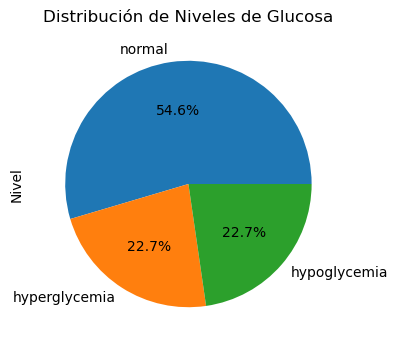

In [13]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [14]:
df_Y_scaled['Nivel'].value_counts()

normal           9642
hyperglycemia    4011
hypoglycemia     4011
Name: Nivel, dtype: int64

In [15]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'normal',True,4011) 

DEBUGING
lenFilter 9642
r_times 5631
irandom  2
index  2
SI
irandom  1
index  3
SI
irandom  3
index  6
SI
irandom  0
index  6
SI
irandom  0
index  6
SI
irandom  3
index  9
SI
irandom  3
index  12
SI
irandom  3
index  15
NO, segundo intento
index  15
SI
irandom  1
index  17
SI
irandom  2
index  19
SI
irandom  1
index  20
SI
irandom  2
index  22
SI
irandom  2
index  24
SI
irandom  1
index  25
NO, segundo intento
index  25
SI
irandom  2
index  28
SI
irandom  2
index  30
SI
irandom  3
index  33
SI
irandom  3
index  36
SI
irandom  3
index  39
SI
irandom  3
index  42
SI
irandom  3
index  45
SI
irandom  2
index  47
SI
irandom  3
index  50
NO, segundo intento
index  50
SI
irandom  1
index  52
SI
irandom  1
index  53
SI
irandom  2
index  55
SI
irandom  3
index  58
SI
irandom  0
index  58
SI
irandom  1
index  59
SI
irandom  2
index  61
NO, segundo intento
index  61
NO
irandom  3
index  65
NO, segundo intento
index  65
SI
irandom  1
index  67
SI
irandom  0
index  67
SI
irandom  1
index  68
SI
ira

irandom  0
index  448
SI
irandom  0
index  448
SI
irandom  3
index  451
SI
irandom  1
index  452
SI
irandom  3
index  455
SI
irandom  2
index  457
SI
irandom  3
index  460
NO, segundo intento
index  460
NO
irandom  3
index  464
SI
irandom  1
index  465
SI
irandom  2
index  467
SI
irandom  2
index  469
SI
irandom  1
index  470
NO, segundo intento
index  470
SI
irandom  0
index  471
SI
irandom  0
index  471
NO, segundo intento
index  471
SI
irandom  3
index  475
SI
irandom  0
index  475
SI
irandom  3
index  478
SI
irandom  3
index  481
SI
irandom  3
index  484
SI
irandom  3
index  487
NO, segundo intento
index  487
NO
irandom  1
index  489
NO, segundo intento
index  489
NO
irandom  1
index  491
SI
irandom  3
index  494
SI
irandom  0
index  494
SI
irandom  2
index  496
SI
irandom  3
index  499
SI
irandom  3
index  502
NO, segundo intento
index  502
NO
irandom  3
index  506
SI
irandom  0
index  506
SI
irandom  3
index  509
NO, segundo intento
index  509
NO
irandom  2
index  512
SI
irandom 

irandom  1
index  916
SI
irandom  0
index  916
SI
irandom  1
index  917
SI
irandom  2
index  919
NO, segundo intento
index  919
NO
irandom  1
index  921
NO, segundo intento
index  921
NO
irandom  1
index  923
NO, segundo intento
index  923
NO
irandom  2
index  926
NO, segundo intento
index  926
SI
irandom  3
index  930
SI
irandom  1
index  931
SI
irandom  0
index  931
SI
irandom  2
index  933
NO, segundo intento
index  933
SI
irandom  2
index  936
NO, segundo intento
index  936
SI
irandom  0
index  937
SI
irandom  2
index  939
SI
irandom  1
index  940
NO, segundo intento
index  940
NO
irandom  0
index  941
NO, segundo intento
index  941
SI
irandom  3
index  945
SI
irandom  2
index  947
NO, segundo intento
index  947
NO
irandom  0
index  948
NO, segundo intento
index  948
SI
irandom  1
index  950
SI
irandom  3
index  953
SI
irandom  3
index  956
SI
irandom  2
index  958
SI
irandom  1
index  959
SI
irandom  1
index  960
NO, segundo intento
index  960
NO
irandom  2
index  963
SI
irandom  

irandom  0
index  1710
SI
irandom  1
index  1711
SI
irandom  2
index  1713
NO, segundo intento
index  1713
NO
irandom  3
index  1717
NO, segundo intento
index  1717
NO
irandom  3
index  1721
NO, segundo intento
index  1721
NO
irandom  0
index  1722
NO, segundo intento
index  1722
NO
irandom  2
index  1725
NO, segundo intento
index  1725
NO
irandom  1
index  1727
SI
irandom  0
index  1727
SI
irandom  0
index  1727
SI
irandom  0
index  1727
SI
irandom  1
index  1728
SI
irandom  3
index  1731
SI
irandom  2
index  1733
SI
irandom  0
index  1733
NO, segundo intento
index  1733
NO
irandom  0
index  1734
NO, segundo intento
index  1734
SI
irandom  1
index  1736
SI
irandom  3
index  1739
SI
irandom  3
index  1742
NO, segundo intento
index  1742
NO
irandom  3
index  1746
NO, segundo intento
index  1746
NO
irandom  2
index  1749
NO, segundo intento
index  1749
SI
irandom  1
index  1751
SI
irandom  1
index  1752
SI
irandom  2
index  1754
SI
irandom  0
index  1754
NO, segundo intento
index  1754
S

irandom  3
index  2143
SI
irandom  3
index  2146
SI
irandom  1
index  2147
SI
irandom  0
index  2147
SI
irandom  3
index  2150
SI
irandom  3
index  2153
SI
irandom  1
index  2154
SI
irandom  3
index  2157
SI
irandom  2
index  2159
SI
irandom  0
index  2159
SI
irandom  3
index  2162
SI
irandom  2
index  2164
SI
irandom  0
index  2164
SI
irandom  1
index  2165
SI
irandom  2
index  2167
SI
irandom  2
index  2169
SI
irandom  1
index  2170
SI
irandom  0
index  2170
SI
irandom  0
index  2170
SI
irandom  3
index  2173
SI
irandom  3
index  2176
SI
irandom  1
index  2177
SI
irandom  3
index  2180
SI
irandom  2
index  2182
SI
irandom  2
index  2184
NO, segundo intento
index  2184
NO
irandom  1
index  2186
SI
irandom  3
index  2189
SI
irandom  1
index  2190
NO, segundo intento
index  2190
NO
irandom  0
index  2191
NO, segundo intento
index  2191
NO
irandom  3
index  2195
SI
irandom  3
index  2198
SI
irandom  2
index  2200
NO, segundo intento
index  2200
SI
irandom  1
index  2202
NO, segundo inten

irandom  1
index  2576
SI
irandom  3
index  2579
SI
irandom  1
index  2580
SI
irandom  0
index  2580
NO, segundo intento
index  2580
NO
irandom  0
index  2581
NO, segundo intento
index  2581
NO
irandom  1
index  2583
NO, segundo intento
index  2583
SI
irandom  2
index  2586
SI
irandom  1
index  2587
NO, segundo intento
index  2587
SI
irandom  3
index  2591
SI
irandom  3
index  2594
SI
irandom  2
index  2596
SI
irandom  0
index  2596
NO, segundo intento
index  2596
NO
irandom  1
index  2598
NO, segundo intento
index  2598
SI
irandom  1
index  2600
SI
irandom  3
index  2603
SI
irandom  1
index  2604
SI
irandom  1
index  2605
SI
irandom  0
index  2605
SI
irandom  0
index  2605
SI
irandom  3
index  2608
SI
irandom  2
index  2610
NO, segundo intento
index  2610
NO
irandom  0
index  2611
NO, segundo intento
index  2611
SI
irandom  1
index  2613
NO, segundo intento
index  2613
NO
irandom  1
index  2615
NO, segundo intento
index  2615
NO
irandom  0
index  2616
NO, segundo intento
index  2616
N

irandom  1
index  3036
SI
irandom  2
index  3038
SI
irandom  0
index  3038
NO, segundo intento
index  3038
NO
irandom  2
index  3041
SI
irandom  2
index  3043
SI
irandom  0
index  3043
NO, segundo intento
index  3043
SI
irandom  1
index  3045
SI
irandom  1
index  3046
SI
irandom  1
index  3047
SI
irandom  3
index  3050
NO, segundo intento
index  3050
SI
irandom  3
index  3054
NO, segundo intento
index  3054
SI
irandom  0
index  3055
SI
irandom  3
index  3058
SI
irandom  1
index  3059
SI
irandom  1
index  3060
NO, segundo intento
index  3060
NO
irandom  2
index  3063
SI
irandom  3
index  3066
SI
irandom  1
index  3067
SI
irandom  2
index  3069
SI
irandom  0
index  3069
SI
irandom  2
index  3071
NO, segundo intento
index  3071
NO
irandom  2
index  3074
NO, segundo intento
index  3074
SI
irandom  1
index  3076
NO, segundo intento
index  3076
SI
irandom  3
index  3080
SI
irandom  2
index  3082
NO, segundo intento
index  3082
NO
irandom  0
index  3083
NO, segundo intento
index  3083
SI
iran

irandom  3
index  3424
NO, segundo intento
index  3424
NO
irandom  0
index  3425
NO, segundo intento
index  3425
NO
irandom  2
index  3428
SI
irandom  0
index  3428
SI
irandom  0
index  3428
SI
irandom  3
index  3431
SI
irandom  1
index  3432
SI
irandom  3
index  3435
SI
irandom  1
index  3436
SI
irandom  3
index  3439
SI
irandom  1
index  3440
SI
irandom  3
index  3443
NO, segundo intento
index  3443
NO
irandom  1
index  3445
NO, segundo intento
index  3445
NO
irandom  3
index  3449
NO, segundo intento
index  3449
SI
irandom  1
index  3451
NO, segundo intento
index  3451
SI
irandom  0
index  3452
SI
irandom  0
index  3452
NO, segundo intento
index  3452
NO
irandom  3
index  3456
NO, segundo intento
index  3456
SI
irandom  3
index  3460
SI
irandom  3
index  3463
SI
irandom  0
index  3463
SI
irandom  3
index  3466
NO, segundo intento
index  3466
NO
irandom  2
index  3469
SI
irandom  3
index  3472
SI
irandom  2
index  3474
NO, segundo intento
index  3474
NO
irandom  1
index  3476
SI
iran

irandom  1
index  3807
SI
irandom  0
index  3807
SI
irandom  2
index  3809
NO, segundo intento
index  3809
SI
irandom  0
index  3810
SI
irandom  0
index  3810
SI
irandom  3
index  3813
SI
irandom  0
index  3813
SI
irandom  1
index  3814
SI
irandom  0
index  3814
SI
irandom  1
index  3815
NO, segundo intento
index  3815
SI
irandom  3
index  3819
SI
irandom  0
index  3819
SI
irandom  0
index  3819
SI
irandom  1
index  3820
SI
irandom  3
index  3823
SI
irandom  2
index  3825
SI
irandom  1
index  3826
SI
irandom  2
index  3828
SI
irandom  1
index  3829
SI
irandom  1
index  3830
NO, segundo intento
index  3830
NO
irandom  0
index  3831
NO, segundo intento
index  3831
NO
irandom  3
index  3835
NO, segundo intento
index  3835
NO
irandom  1
index  3837
NO, segundo intento
index  3837
SI
irandom  2
index  3840
SI
irandom  1
index  3841
SI
irandom  0
index  3841
SI
irandom  0
index  3841
SI
irandom  0
index  3841
SI
irandom  1
index  3842
SI
irandom  1
index  3843
SI
irandom  2
index  3845
SI
ir

irandom  2
index  4237
SI
irandom  2
index  4239
SI
irandom  1
index  4240
SI
irandom  3
index  4243
SI
irandom  3
index  4246
SI
irandom  1
index  4247
SI
irandom  2
index  4249
SI
irandom  2
index  4251
SI
irandom  0
index  4251
SI
irandom  1
index  4252
SI
irandom  2
index  4254
SI
irandom  1
index  4255
NO, segundo intento
index  4255
NO
irandom  1
index  4257
NO, segundo intento
index  4257
NO
irandom  1
index  4259
NO, segundo intento
index  4259
NO
irandom  2
index  4262
SI
irandom  0
index  4262
SI
irandom  3
index  4265
NO, segundo intento
index  4265
SI
irandom  0
index  4266
SI
irandom  1
index  4267
SI
irandom  0
index  4267
NO, segundo intento
index  4267
SI
irandom  0
index  4268
SI
irandom  2
index  4270
SI
irandom  3
index  4273
SI
irandom  1
index  4274
SI
irandom  1
index  4275
SI
irandom  3
index  4278
SI
irandom  1
index  4279
NO, segundo intento
index  4279
NO
irandom  1
index  4281
NO, segundo intento
index  4281
NO
irandom  1
index  4283
SI
irandom  2
index  4285

irandom  2
index  4640
NO, segundo intento
index  4640
NO
irandom  1
index  4642
NO, segundo intento
index  4642
NO
irandom  2
index  4645
SI
irandom  1
index  4646
SI
irandom  3
index  4649
NO, segundo intento
index  4649
SI
irandom  2
index  4652
NO, segundo intento
index  4652
SI
irandom  2
index  4655
SI
irandom  0
index  4655
SI
irandom  3
index  4658
NO, segundo intento
index  4658
SI
irandom  3
index  4662
SI
irandom  0
index  4662
SI
irandom  2
index  4664
SI
irandom  3
index  4667
SI
irandom  0
index  4667
SI
irandom  2
index  4669
NO, segundo intento
index  4669
NO
irandom  2
index  4672
SI
irandom  2
index  4674
NO, segundo intento
index  4674
SI
irandom  1
index  4676
NO, segundo intento
index  4676
NO
irandom  3
index  4680
SI
irandom  0
index  4680
SI
irandom  3
index  4683
SI
irandom  2
index  4685
SI
irandom  0
index  4685
SI
irandom  3
index  4688
SI
irandom  1
index  4689
SI
irandom  2
index  4691
SI
irandom  0
index  4691
SI
irandom  2
index  4693
SI
irandom  2
index

irandom  3
index  5062
SI
irandom  2
index  5064
SI
irandom  1
index  5065
SI
irandom  0
index  5065
SI
irandom  2
index  5067
SI
irandom  2
index  5069
NO, segundo intento
index  5069
NO
irandom  3
index  5073
SI
irandom  3
index  5076
SI
irandom  0
index  5076
SI
irandom  2
index  5078
NO, segundo intento
index  5078
NO
irandom  0
index  5079
NO, segundo intento
index  5079
NO
irandom  2
index  5082
SI
irandom  2
index  5084
NO, segundo intento
index  5084
SI
irandom  3
index  5088
SI
irandom  1
index  5089
SI
irandom  3
index  5092
NO, segundo intento
index  5092
SI
irandom  2
index  5095
NO, segundo intento
index  5095
SI
irandom  0
index  5096
SI
irandom  0
index  5096
SI
irandom  3
index  5099
SI
irandom  1
index  5100
SI
irandom  1
index  5101
SI
irandom  2
index  5103
NO, segundo intento
index  5103
SI
irandom  1
index  5105
SI
irandom  0
index  5105
SI
irandom  2
index  5107
SI
irandom  0
index  5107
SI
irandom  1
index  5108
SI
irandom  3
index  5111
SI
irandom  3
index  5114

irandom  1
index  5481
NO, segundo intento
index  5481
SI
irandom  1
index  5483
SI
irandom  3
index  5486
SI
irandom  3
index  5489
NO, segundo intento
index  5489
SI
irandom  3
index  5493
SI
irandom  2
index  5495
SI
irandom  3
index  5498
NO, segundo intento
index  5498
NO
irandom  2
index  5501
NO, segundo intento
index  5501
NO
irandom  2
index  5504
NO, segundo intento
index  5504
NO
irandom  3
index  5508
SI
irandom  0
index  5508
SI
irandom  3
index  5511
SI
irandom  2
index  5513
SI
irandom  2
index  5515
NO, segundo intento
index  5515
NO
irandom  1
index  5517
NO, segundo intento
index  5517
NO
irandom  3
index  5521
NO, segundo intento
index  5521
NO
irandom  0
index  5522
NO, segundo intento
index  5522
NO
irandom  0
index  5523
NO, segundo intento
index  5523
NO
irandom  0
index  5524
NO, segundo intento
index  5524
NO
irandom  1
index  5526
NO, segundo intento
index  5526
NO
irandom  0
index  5527
NO, segundo intento
index  5527
NO
irandom  1
index  5529
NO, segundo int

irandom  1
index  5903
SI
irandom  3
index  5906
NO, segundo intento
index  5906
SI
irandom  3
index  5910
NO, segundo intento
index  5910
NO
irandom  2
index  5913
SI
irandom  1
index  5914
NO, segundo intento
index  5914
NO
irandom  0
index  5915
NO, segundo intento
index  5915
NO
irandom  1
index  5917
NO, segundo intento
index  5917
NO
irandom  3
index  5921
NO, segundo intento
index  5921
NO
irandom  3
index  5925
NO, segundo intento
index  5925
NO
irandom  2
index  5928
NO, segundo intento
index  5928
NO
irandom  2
index  5931
NO, segundo intento
index  5931
NO
irandom  3
index  5935
NO, segundo intento
index  5935
NO
irandom  1
index  5937
NO, segundo intento
index  5937
NO
irandom  0
index  5938
NO, segundo intento
index  5938
NO
irandom  2
index  5941
NO, segundo intento
index  5941
NO
irandom  2
index  5944
NO, segundo intento
index  5944
NO
irandom  3
index  5948
NO, segundo intento
index  5948
NO
irandom  2
index  5951
NO, segundo intento
index  5951
NO
irandom  0
index  59

irandom  0
index  6344
NO, segundo intento
index  6344
SI
irandom  3
index  6348
SI
irandom  1
index  6349
SI
irandom  3
index  6352
NO, segundo intento
index  6352
NO
irandom  3
index  6356
SI
irandom  1
index  6357
SI
irandom  1
index  6358
SI
irandom  2
index  6360
SI
irandom  1
index  6361
NO, segundo intento
index  6361
NO
irandom  1
index  6363
NO, segundo intento
index  6363
NO
irandom  1
index  6365
NO, segundo intento
index  6365
NO
irandom  1
index  6367
NO, segundo intento
index  6367
NO
irandom  1
index  6369
NO, segundo intento
index  6369
NO
irandom  2
index  6372
NO, segundo intento
index  6372
NO
irandom  3
index  6376
NO, segundo intento
index  6376
NO
irandom  1
index  6378
SI
irandom  3
index  6381
SI
irandom  2
index  6383
SI
irandom  0
index  6383
SI
irandom  0
index  6383
NO, segundo intento
index  6383
NO
irandom  0
index  6384
NO, segundo intento
index  6384
NO
irandom  3
index  6388
NO, segundo intento
index  6388
NO
irandom  0
index  6389
NO, segundo intento
i

irandom  2
index  6735
SI
irandom  3
index  6738
SI
irandom  2
index  6740
NO, segundo intento
index  6740
NO
irandom  3
index  6744
SI
irandom  3
index  6747
NO, segundo intento
index  6747
NO
irandom  2
index  6750
SI
irandom  2
index  6752
NO, segundo intento
index  6752
NO
irandom  2
index  6755
NO, segundo intento
index  6755
NO
irandom  1
index  6757
NO, segundo intento
index  6757
NO
irandom  1
index  6759
NO, segundo intento
index  6759
NO
irandom  3
index  6763
NO, segundo intento
index  6763
NO
irandom  3
index  6767
NO, segundo intento
index  6767
NO
irandom  3
index  6771
SI
irandom  0
index  6771
SI
irandom  3
index  6774
NO, segundo intento
index  6774
NO
irandom  1
index  6776
NO, segundo intento
index  6776
NO
irandom  3
index  6780
NO, segundo intento
index  6780
NO
irandom  2
index  6783
SI
irandom  2
index  6785
SI
irandom  2
index  6787
SI
irandom  3
index  6790
NO, segundo intento
index  6790
NO
irandom  1
index  6792
SI
irandom  1
index  6793
NO, segundo intento
i

irandom  1
index  7170
SI
irandom  3
index  7173
SI
irandom  1
index  7174
SI
irandom  2
index  7176
SI
irandom  2
index  7178
NO, segundo intento
index  7178
NO
irandom  1
index  7180
NO, segundo intento
index  7180
NO
irandom  0
index  7181
NO, segundo intento
index  7181
NO
irandom  0
index  7182
NO, segundo intento
index  7182
SI
irandom  3
index  7186
SI
irandom  3
index  7189
SI
irandom  3
index  7192
SI
irandom  3
index  7195
SI
irandom  2
index  7197
SI
irandom  3
index  7200
SI
irandom  1
index  7201
SI
irandom  2
index  7203
SI
irandom  3
index  7206
NO, segundo intento
index  7206
NO
irandom  0
index  7207
NO, segundo intento
index  7207
NO
irandom  3
index  7211
NO, segundo intento
index  7211
NO
irandom  3
index  7215
NO, segundo intento
index  7215
SI
irandom  0
index  7216
SI
irandom  2
index  7218
SI
irandom  0
index  7218
SI
irandom  2
index  7220
SI
irandom  3
index  7223
NO, segundo intento
index  7223
SI
irandom  0
index  7224
SI
irandom  0
index  7224
SI
irandom  3

irandom  3
index  7619
SI
irandom  0
index  7619
SI
irandom  2
index  7621
SI
irandom  1
index  7622
NO, segundo intento
index  7622
NO
irandom  1
index  7624
SI
irandom  1
index  7625
SI
irandom  1
index  7626
NO, segundo intento
index  7626
SI
irandom  2
index  7629
SI
irandom  3
index  7632
NO, segundo intento
index  7632
SI
irandom  1
index  7634
SI
irandom  0
index  7634
SI
irandom  0
index  7634
SI
irandom  0
index  7634
SI
irandom  3
index  7637
SI
irandom  0
index  7637
SI
irandom  2
index  7639
SI
irandom  0
index  7639
SI
irandom  2
index  7641
SI
irandom  1
index  7642
NO, segundo intento
index  7642
NO
irandom  0
index  7643
NO, segundo intento
index  7643
SI
irandom  0
index  7644
SI
irandom  0
index  7644
SI
irandom  0
index  7644
SI
irandom  0
index  7644
SI
irandom  1
index  7645
SI
irandom  1
index  7646
SI
irandom  0
index  7646
SI
irandom  2
index  7648
SI
irandom  1
index  7649
SI
irandom  1
index  7650
SI
irandom  1
index  7651
SI
irandom  1
index  7652
SI
irandom 

irandom  3
index  8017
NO, segundo intento
index  8017
NO
irandom  1
index  8019
SI
irandom  3
index  8022
SI
irandom  0
index  8022
SI
irandom  3
index  8025
SI
irandom  1
index  8026
NO, segundo intento
index  8026
NO
irandom  0
index  8027
NO, segundo intento
index  8027
SI
irandom  3
index  8031
SI
irandom  2
index  8033
NO, segundo intento
index  8033
SI
irandom  1
index  8035
NO, segundo intento
index  8035
NO
irandom  0
index  8036
NO, segundo intento
index  8036
NO
irandom  0
index  8037
NO, segundo intento
index  8037
NO
irandom  3
index  8041
NO, segundo intento
index  8041
SI
irandom  1
index  8043
SI
irandom  0
index  8043
SI
irandom  1
index  8044
NO, segundo intento
index  8044
NO
irandom  1
index  8046
SI
irandom  0
index  8046
SI
irandom  2
index  8048
SI
irandom  3
index  8051
SI
irandom  0
index  8051
SI
irandom  0
index  8051
SI
irandom  3
index  8054
SI
irandom  3
index  8057
SI
irandom  2
index  8059
SI
irandom  2
index  8061
SI
irandom  0
index  8061
NO, segundo i

irandom  3
index  8444
SI
irandom  1
index  8445
SI
irandom  2
index  8447
SI
irandom  1
index  8448
NO, segundo intento
index  8448
SI
irandom  3
index  8452
NO, segundo intento
index  8452
SI
irandom  2
index  8455
SI
irandom  1
index  8456
NO, segundo intento
index  8456
SI
irandom  1
index  8458
SI
irandom  2
index  8460
NO, segundo intento
index  8460
NO
irandom  3
index  8464
NO, segundo intento
index  8464
NO
irandom  1
index  8466
NO, segundo intento
index  8466
NO
irandom  3
index  8470
SI
irandom  3
index  8473
SI
irandom  0
index  8473
SI
irandom  1
index  8474
SI
irandom  3
index  8477
SI
irandom  2
index  8479
NO, segundo intento
index  8479
NO
irandom  3
index  8483
NO, segundo intento
index  8483
SI
irandom  0
index  8484
SI
irandom  0
index  8484
SI
irandom  2
index  8486
SI
irandom  2
index  8488
NO, segundo intento
index  8488
NO
irandom  1
index  8490
NO, segundo intento
index  8490
NO
irandom  1
index  8492
NO, segundo intento
index  8492
NO
irandom  3
index  8496
N

irandom  2
index  8937
SI
irandom  3
index  8940
NO, segundo intento
index  8940
NO
irandom  2
index  8943
SI
irandom  2
index  8945
SI
irandom  1
index  8946
NO, segundo intento
index  8946
SI
irandom  1
index  8948
NO, segundo intento
index  8948
SI
irandom  2
index  8951
SI
irandom  2
index  8953
SI
irandom  1
index  8954
NO, segundo intento
index  8954
SI
irandom  3
index  8958
SI
irandom  0
index  8958
NO, segundo intento
index  8958
NO
irandom  3
index  8962
NO, segundo intento
index  8962
SI
irandom  1
index  8964
SI
irandom  0
index  8964
NO, segundo intento
index  8964
NO
irandom  3
index  8968
SI
irandom  3
index  8971
SI
irandom  2
index  8973
SI
irandom  0
index  8973
NO, segundo intento
index  8973
SI
irandom  0
index  8974
NO, segundo intento
index  8974
NO
irandom  3
index  8978
SI
irandom  2
index  8980
SI
irandom  0
index  8980
SI
irandom  0
index  8980
SI
irandom  3
index  8983
NO, segundo intento
index  8983
NO
irandom  0
index  8984
NO, segundo intento
index  8984
S

irandom  0
index  9375
SI
irandom  3
index  9378
SI
irandom  1
index  9379
SI
irandom  3
index  9382
SI
irandom  2
index  9384
SI
irandom  1
index  9385
SI
irandom  0
index  9385
SI
irandom  2
index  9387
NO, segundo intento
index  9387
NO
irandom  3
index  9391
NO, segundo intento
index  9391
NO
irandom  1
index  9393
NO, segundo intento
index  9393
NO
irandom  1
index  9395
NO, segundo intento
index  9395
NO
irandom  3
index  9399
NO, segundo intento
index  9399
NO
irandom  0
index  9400
NO, segundo intento
index  9400
NO
irandom  1
index  9402
NO, segundo intento
index  9402
NO
irandom  2
index  9405
NO, segundo intento
index  9405
NO
irandom  0
index  9406
NO, segundo intento
index  9406
SI
irandom  1
index  9408
SI
irandom  2
index  9410
SI
irandom  0
index  9410
SI
irandom  3
index  9413
NO, segundo intento
index  9413
NO
irandom  1
index  9415
NO, segundo intento
index  9415
NO
irandom  3
index  9419
NO, segundo intento
index  9419
SI
irandom  3
index  9423
SI
irandom  1
index  

irandom  2
index  9767
SI
irandom  2
index  9769
SI
irandom  0
index  9769
NO, segundo intento
index  9769
NO
irandom  1
index  9771
SI
irandom  2
index  9773
SI
irandom  1
index  9774
SI
irandom  1
index  9775
SI
irandom  3
index  9778
NO, segundo intento
index  9778
NO
irandom  0
index  9779
NO, segundo intento
index  9779
NO
irandom  3
index  9783
NO, segundo intento
index  9783
SI
irandom  2
index  9786
SI
irandom  2
index  9788
SI
irandom  2
index  9790
NO, segundo intento
index  9790
NO
irandom  1
index  9792
NO, segundo intento
index  9792
NO
irandom  3
index  9796
NO, segundo intento
index  9796
SI
irandom  0
index  9797
SI
irandom  1
index  9798
SI
irandom  2
index  9800
SI
irandom  0
index  9800
SI
irandom  1
index  9801
NO, segundo intento
index  9801
NO
irandom  2
index  9804
NO, segundo intento
index  9804
NO
irandom  1
index  9806
NO, segundo intento
index  9806
SI
irandom  3
index  9810
SI
irandom  2
index  9812
SI
irandom  1
index  9813
NO, segundo intento
index  9813
S

irandom  3
index  10214
NO, segundo intento
index  10214
NO
irandom  0
index  10215
NO, segundo intento
index  10215
NO
irandom  1
index  10217
NO, segundo intento
index  10217
NO
irandom  3
index  10221
NO, segundo intento
index  10221
NO
irandom  1
index  10223
NO, segundo intento
index  10223
NO
irandom  2
index  10226
NO, segundo intento
index  10226
NO
irandom  2
index  10229
NO, segundo intento
index  10229
NO
irandom  0
index  10230
NO, segundo intento
index  10230
NO
irandom  2
index  10233
NO, segundo intento
index  10233
NO
irandom  0
index  10234
NO, segundo intento
index  10234
SI
irandom  3
index  10238
SI
irandom  3
index  10241
SI
irandom  1
index  10242
SI
irandom  0
index  10242
NO, segundo intento
index  10242
NO
irandom  2
index  10245
NO, segundo intento
index  10245
NO
irandom  2
index  10248
NO, segundo intento
index  10248
NO
irandom  1
index  10250
NO, segundo intento
index  10250
SI
irandom  3
index  10254
NO, segundo intento
index  10254
SI
irandom  1
index  1

irandom  1
index  10596
NO, segundo intento
index  10596
NO
irandom  2
index  10599
NO, segundo intento
index  10599
NO
irandom  1
index  10601
SI
irandom  2
index  10603
SI
irandom  1
index  10604
SI
irandom  1
index  10605
NO, segundo intento
index  10605
NO
irandom  2
index  10608
NO, segundo intento
index  10608
NO
irandom  2
index  10611
SI
irandom  2
index  10613
SI
irandom  2
index  10615
SI
irandom  0
index  10615
SI
irandom  1
index  10616
SI
irandom  3
index  10619
SI
irandom  3
index  10622
SI
irandom  3
index  10625
SI
irandom  3
index  10628
NO, segundo intento
index  10628
SI
irandom  2
index  10631
NO, segundo intento
index  10631
NO
irandom  1
index  10633
NO, segundo intento
index  10633
NO
irandom  0
index  10634
NO, segundo intento
index  10634
SI
irandom  2
index  10637
SI
irandom  3
index  10640
SI
irandom  2
index  10642
SI
irandom  2
index  10644
SI
irandom  0
index  10644
NO, segundo intento
index  10644
SI
irandom  0
index  10645
SI
irandom  1
index  10646
NO, 

irandom  2
index  11032
SI
irandom  1
index  11033
SI
irandom  1
index  11034
NO, segundo intento
index  11034
NO
irandom  1
index  11036
NO, segundo intento
index  11036
NO
irandom  1
index  11038
NO, segundo intento
index  11038
NO
irandom  3
index  11042
SI
irandom  3
index  11045
NO, segundo intento
index  11045
NO
irandom  2
index  11048
NO, segundo intento
index  11048
NO
irandom  3
index  11052
NO, segundo intento
index  11052
NO
irandom  0
index  11053
NO, segundo intento
index  11053
NO
irandom  2
index  11056
NO, segundo intento
index  11056
NO
irandom  2
index  11059
NO, segundo intento
index  11059
NO
irandom  0
index  11060
NO, segundo intento
index  11060
NO
irandom  2
index  11063
SI
irandom  0
index  11063
NO, segundo intento
index  11063
NO
irandom  1
index  11065
NO, segundo intento
index  11065
NO
irandom  2
index  11068
SI
irandom  2
index  11070
SI
irandom  0
index  11070
SI
irandom  3
index  11073
SI
irandom  2
index  11075
SI
irandom  1
index  11076
NO, segundo i

irandom  1
index  11431
SI
irandom  1
index  11432
SI
irandom  0
index  11432
NO, segundo intento
index  11432
NO
irandom  2
index  11435
NO, segundo intento
index  11435
NO
irandom  2
index  11438
NO, segundo intento
index  11438
SI
irandom  2
index  11441
NO, segundo intento
index  11441
NO
irandom  2
index  11444
SI
irandom  2
index  11446
SI
irandom  3
index  11449
NO, segundo intento
index  11449
SI
irandom  3
index  11453
NO, segundo intento
index  11453
NO
irandom  1
index  11455
NO, segundo intento
index  11455
NO
irandom  2
index  11458
NO, segundo intento
index  11458
NO
irandom  2
index  11461
SI
irandom  0
index  11461
SI
irandom  3
index  11464
SI
irandom  1
index  11465
NO, segundo intento
index  11465
SI
irandom  3
index  11469
NO, segundo intento
index  11469
NO
irandom  2
index  11472
NO, segundo intento
index  11472
SI
irandom  0
index  11473
SI
irandom  0
index  11473
SI
irandom  3
index  11476
SI
irandom  3
index  11479
NO, segundo intento
index  11479
NO
irandom  2

irandom  2
index  11862
NO, segundo intento
index  11862
NO
irandom  0
index  11863
NO, segundo intento
index  11863
NO
irandom  2
index  11866
NO, segundo intento
index  11866
NO
irandom  2
index  11869
NO, segundo intento
index  11869
SI
irandom  3
index  11873
SI
irandom  0
index  11873
SI
irandom  1
index  11874
SI
irandom  2
index  11876
NO, segundo intento
index  11876
NO
irandom  0
index  11877
NO, segundo intento
index  11877
NO
irandom  1
index  11879
NO, segundo intento
index  11879
NO
irandom  2
index  11882
NO, segundo intento
index  11882
NO
irandom  0
index  11883
NO, segundo intento
index  11883
NO
irandom  3
index  11887
SI
irandom  2
index  11889
SI
irandom  0
index  11889
SI
irandom  0
index  11889
SI
irandom  2
index  11891
SI
irandom  0
index  11891
NO, segundo intento
index  11891
NO
irandom  2
index  11894
NO, segundo intento
index  11894
NO
irandom  3
index  11898
SI
irandom  2
index  11900
NO, segundo intento
index  11900
NO
irandom  2
index  11903
SI
irandom  1

irandom  0
index  12301
SI
irandom  1
index  12302
SI
irandom  2
index  12304
NO, segundo intento
index  12304
NO
irandom  1
index  12306
NO, segundo intento
index  12306
NO
irandom  1
index  12308
NO, segundo intento
index  12308
NO
irandom  1
index  12310
NO, segundo intento
index  12310
NO
irandom  0
index  12311
NO, segundo intento
index  12311
NO
irandom  1
index  12313
NO, segundo intento
index  12313
NO
irandom  1
index  12315
NO, segundo intento
index  12315
NO
irandom  3
index  12319
NO, segundo intento
index  12319
NO
irandom  0
index  12320
NO, segundo intento
index  12320
NO
irandom  1
index  12322
NO, segundo intento
index  12322
NO
irandom  1
index  12324
NO, segundo intento
index  12324
SI
irandom  3
index  12328
SI
irandom  1
index  12329
SI
irandom  2
index  12331
SI
irandom  0
index  12331
SI
irandom  2
index  12333
NO, segundo intento
index  12333
NO
irandom  2
index  12336
SI
irandom  2
index  12338
SI
irandom  3
index  12341
SI
irandom  3
index  12344
NO, segundo i

irandom  0
index  12689
NO, segundo intento
index  12689
SI
irandom  2
index  12692
NO, segundo intento
index  12692
NO
irandom  1
index  12694
NO, segundo intento
index  12694
NO
irandom  0
index  12695
NO, segundo intento
index  12695
NO
irandom  2
index  12698
SI
irandom  2
index  12700
SI
irandom  2
index  12702
SI
irandom  1
index  12703
NO, segundo intento
index  12703
NO
irandom  1
index  12705
NO, segundo intento
index  12705
NO
irandom  1
index  12707
NO, segundo intento
index  12707
SI
irandom  0
index  12708
SI
irandom  2
index  12710
NO, segundo intento
index  12710
SI
irandom  2
index  12713
SI
irandom  1
index  12714
NO, segundo intento
index  12714
NO
irandom  3
index  12718
NO, segundo intento
index  12718
NO
irandom  1
index  12720
NO, segundo intento
index  12720
SI
irandom  2
index  12723
NO, segundo intento
index  12723
NO
irandom  2
index  12726
SI
irandom  1
index  12727
NO, segundo intento
index  12727
SI
irandom  2
index  12730
NO, segundo intento
index  12730
N

irandom  2
index  13085
NO, segundo intento
index  13085
NO
irandom  1
index  13087
SI
irandom  0
index  13087
SI
irandom  1
index  13088
SI
irandom  2
index  13090
SI
irandom  2
index  13092
NO, segundo intento
index  13092
NO
irandom  0
index  13093
NO, segundo intento
index  13093
SI
irandom  2
index  13096
SI
irandom  2
index  13098
SI
irandom  2
index  13100
SI
irandom  3
index  13103
NO, segundo intento
index  13103
NO
irandom  3
index  13107
SI
irandom  3
index  13110
SI
irandom  1
index  13111
NO, segundo intento
index  13111
NO
irandom  1
index  13113
SI
irandom  0
index  13113
NO, segundo intento
index  13113
NO
irandom  2
index  13116
NO, segundo intento
index  13116
NO
irandom  2
index  13119
NO, segundo intento
index  13119
SI
irandom  2
index  13122
SI
irandom  3
index  13125
SI
irandom  2
index  13127
SI
irandom  2
index  13129
NO, segundo intento
index  13129
NO
irandom  2
index  13132
SI
irandom  3
index  13135
NO, segundo intento
index  13135
SI
irandom  3
index  1313

irandom  3
index  118
SI
irandom  0
index  118
SI
irandom  0
index  118
SI
irandom  3
index  121
SI
irandom  1
index  122
NO, segundo intento
index  122
SI
irandom  0
index  123
SI
irandom  2
index  125
NO, segundo intento
index  125
NO
irandom  2
index  128
SI
irandom  0
index  128
SI
irandom  3
index  131
NO, segundo intento
index  131
NO
irandom  3
index  135
NO, segundo intento
index  135
NO
irandom  0
index  136
NO, segundo intento
index  136
NO
irandom  1
index  138
NO, segundo intento
index  138
NO
irandom  3
index  142
NO, segundo intento
index  142
NO
irandom  1
index  144
SI
irandom  3
index  147
SI
irandom  3
index  150
SI
irandom  2
index  152
SI
irandom  2
index  154
SI
irandom  3
index  157
SI
irandom  2
index  159
SI
irandom  3
index  162
SI
irandom  1
index  163
SI
irandom  2
index  165
SI
irandom  0
index  165
SI
irandom  2
index  167
SI
irandom  2
index  169
NO, segundo intento
index  169
SI
irandom  1
index  171
SI
irandom  1
index  172
SI
irandom  2
index  174
SI
ir

irandom  3
index  659
SI
irandom  2
index  661
NO, segundo intento
index  661
NO
irandom  2
index  664
SI
irandom  1
index  665
NO, segundo intento
index  665
NO
irandom  3
index  669
SI
irandom  1
index  670
NO, segundo intento
index  670
NO
irandom  3
index  674
SI
irandom  2
index  676
NO, segundo intento
index  676
NO
irandom  2
index  679
NO, segundo intento
index  679
NO
irandom  2
index  682
SI
irandom  3
index  685
SI
irandom  3
index  688
NO, segundo intento
index  688
SI
irandom  3
index  692
SI
irandom  2
index  694
NO, segundo intento
index  694
SI
irandom  0
index  695
SI
irandom  3
index  698
NO, segundo intento
index  698
NO
irandom  3
index  702
SI
irandom  1
index  703
SI
irandom  1
index  704
SI
irandom  1
index  705
SI
irandom  2
index  707
NO, segundo intento
index  707
NO
irandom  3
index  711
NO, segundo intento
index  711
NO
irandom  2
index  714
NO, segundo intento
index  714
NO
irandom  3
index  718
NO, segundo intento
index  718
NO
irandom  3
index  722
NO, se

irandom  3
index  1450
NO, segundo intento
index  1450
NO
irandom  1
index  1452
NO, segundo intento
index  1452
NO
irandom  1
index  1454
NO, segundo intento
index  1454
NO
irandom  2
index  1457
NO, segundo intento
index  1457
NO
irandom  2
index  1460
NO, segundo intento
index  1460
NO
irandom  1
index  1462
NO, segundo intento
index  1462
NO
irandom  3
index  1466
SI
irandom  2
index  1468
SI
irandom  0
index  1468
SI
irandom  2
index  1470
SI
irandom  0
index  1470
SI
irandom  0
index  1470
SI
irandom  3
index  1473
NO, segundo intento
index  1473
NO
irandom  1
index  1475
NO, segundo intento
index  1475
NO
irandom  0
index  1476
NO, segundo intento
index  1476
NO
irandom  2
index  1479
NO, segundo intento
index  1479
NO
irandom  3
index  1483
SI
irandom  2
index  1485
NO, segundo intento
index  1485
SI
irandom  2
index  1488
SI
irandom  3
index  1491
SI
irandom  3
index  1494
SI
irandom  0
index  1494
SI
irandom  1
index  1495
SI
irandom  3
index  1498
NO, segundo intento
index  

irandom  3
index  1920
SI
irandom  2
index  1922
SI
irandom  0
index  1922
SI
irandom  1
index  1923
SI
irandom  2
index  1925
NO, segundo intento
index  1925
SI
irandom  3
index  1929
SI
irandom  3
index  1932
SI
irandom  3
index  1935
SI
irandom  1
index  1936
SI
irandom  3
index  1939
SI
irandom  2
index  1941
SI
irandom  3
index  1944
SI
irandom  1
index  1945
NO, segundo intento
index  1945
SI
irandom  1
index  1947
NO, segundo intento
index  1947
SI
irandom  1
index  1949
SI
irandom  1
index  1950
SI
irandom  0
index  1950
SI
irandom  3
index  1953
NO, segundo intento
index  1953
NO
irandom  1
index  1955
NO, segundo intento
index  1955
NO
irandom  1
index  1957
NO, segundo intento
index  1957
SI
irandom  0
index  1958
SI
irandom  0
index  1958
SI
irandom  0
index  1958
SI
irandom  2
index  1960
NO, segundo intento
index  1960
NO
irandom  3
index  1964
SI
irandom  1
index  1965
SI
irandom  2
index  1967
NO, segundo intento
index  1967
NO
irandom  3
index  1971
NO, segundo intento

irandom  3
index  2335
SI
irandom  2
index  2337
NO, segundo intento
index  2337
SI
irandom  1
index  2339
SI
irandom  2
index  2341
NO, segundo intento
index  2341
NO
irandom  3
index  2345
SI
irandom  1
index  2346
SI
irandom  3
index  2349
NO, segundo intento
index  2349
NO
irandom  1
index  2351
NO, segundo intento
index  2351
SI
irandom  0
index  2352
SI
irandom  1
index  2353
SI
irandom  0
index  2353
SI
irandom  2
index  2355
SI
irandom  3
index  2358
SI
irandom  1
index  2359
SI
irandom  1
index  2360
NO, segundo intento
index  2360
NO
irandom  3
index  2364
SI
irandom  1
index  2365
SI
irandom  2
index  2367
NO, segundo intento
index  2367
NO
irandom  3
index  2371
NO, segundo intento
index  2371
SI
irandom  1
index  2373
NO, segundo intento
index  2373
NO
irandom  1
index  2375
SI
irandom  0
index  2375
SI
irandom  1
index  2376
NO, segundo intento
index  2376
NO
irandom  3
index  2380
SI
irandom  1
index  2381
SI
irandom  3
index  2384
SI
irandom  1
index  2385
SI
irandom  3

irandom  3
index  2847
SI
irandom  2
index  2849
SI
irandom  3
index  2852
SI
irandom  1
index  2853
NO, segundo intento
index  2853
NO
irandom  2
index  2856
NO, segundo intento
index  2856
SI
irandom  2
index  2859
SI
irandom  2
index  2861
SI
irandom  1
index  2862
NO, segundo intento
index  2862
NO
irandom  1
index  2864
NO, segundo intento
index  2864
SI
irandom  0
index  2865
NO, segundo intento
index  2865
SI
irandom  3
index  2869
NO, segundo intento
index  2869
NO
irandom  3
index  2873
NO, segundo intento
index  2873
SI
irandom  0
index  2874
NO, segundo intento
index  2874
NO
irandom  3
index  2878
SI
irandom  2
index  2880
SI
irandom  1
index  2881
NO, segundo intento
index  2881
SI
irandom  2
index  2884
NO, segundo intento
index  2884
NO
irandom  1
index  2886
NO, segundo intento
index  2886
SI
irandom  3
index  2890
SI
irandom  0
index  2890
NO, segundo intento
index  2890
NO
irandom  2
index  2893
NO, segundo intento
index  2893
NO
irandom  3
index  2897
SI
irandom  1
i

irandom  1
index  3262
NO, segundo intento
index  3262
NO
irandom  1
index  3264
SI
irandom  1
index  3265
NO, segundo intento
index  3265
NO
irandom  2
index  3268
NO, segundo intento
index  3268
NO
irandom  0
index  3269
NO, segundo intento
index  3269
SI
irandom  3
index  3273
SI
irandom  2
index  3275
SI
irandom  0
index  3275
SI
irandom  0
index  3275
SI
irandom  3
index  3278
SI
irandom  2
index  3280
NO, segundo intento
index  3280
NO
irandom  2
index  3283
SI
irandom  1
index  3284
NO, segundo intento
index  3284
NO
irandom  2
index  3287
NO, segundo intento
index  3287
SI
irandom  3
index  3291
NO, segundo intento
index  3291
NO
irandom  2
index  3294
SI
irandom  2
index  3296
SI
irandom  3
index  3299
NO, segundo intento
index  3299
NO
irandom  2
index  3302
SI
irandom  3
index  3305
SI
irandom  0
index  3305
NO, segundo intento
index  3305
NO
irandom  3
index  3309
SI
irandom  3
index  3312
NO, segundo intento
index  3312
NO
irandom  2
index  3315
SI
irandom  0
index  3315
S

irandom  0
index  3666
NO, segundo intento
index  3666
SI
irandom  1
index  3668
SI
irandom  2
index  3670
NO, segundo intento
index  3670
SI
irandom  1
index  3672
NO, segundo intento
index  3672
NO
irandom  2
index  3675
NO, segundo intento
index  3675
NO
irandom  2
index  3678
NO, segundo intento
index  3678
SI
irandom  0
index  3679
SI
irandom  3
index  3682
SI
irandom  0
index  3682
SI
irandom  0
index  3682
SI
irandom  3
index  3685
SI
irandom  0
index  3685
SI
irandom  3
index  3688
NO, segundo intento
index  3688
NO
irandom  2
index  3691
SI
irandom  1
index  3692
SI
irandom  1
index  3693
SI
irandom  3
index  3696
NO, segundo intento
index  3696
SI
irandom  0
index  3697
SI
irandom  3
index  3700
NO, segundo intento
index  3700
NO
irandom  2
index  3703
NO, segundo intento
index  3703
SI
irandom  2
index  3706
SI
irandom  1
index  3707
SI
irandom  2
index  3709
NO, segundo intento
index  3709
NO
irandom  3
index  3713
NO, segundo intento
index  3713
NO
irandom  2
index  3716
N

irandom  3
index  4072
SI
irandom  2
index  4074
SI
irandom  1
index  4075
SI
irandom  3
index  4078
SI
irandom  2
index  4080
NO, segundo intento
index  4080
NO
irandom  3
index  4084
SI
irandom  2
index  4086
SI
irandom  0
index  4086
NO, segundo intento
index  4086
NO
irandom  3
index  4090
SI
irandom  2
index  4092
SI
irandom  2
index  4094
NO, segundo intento
index  4094
NO
irandom  2
index  4097
SI
irandom  0
index  4097
SI
irandom  2
index  4099
SI
irandom  1
index  4100
NO, segundo intento
index  4100
NO
irandom  1
index  4102
SI
irandom  0
index  4102
SI
irandom  2
index  4104
NO, segundo intento
index  4104
NO
irandom  1
index  4106
NO, segundo intento
index  4106
NO
irandom  3
index  4110
SI
irandom  3
index  4113
NO, segundo intento
index  4113
SI
irandom  0
index  4114
NO, segundo intento
index  4114
NO
irandom  1
index  4116
NO, segundo intento
index  4116
NO
irandom  0
index  4117
NO, segundo intento
index  4117
SI
irandom  2
index  4120
SI
irandom  2
index  4122
NO, seg

irandom  0
index  4570
NO, segundo intento
index  4570
SI
irandom  3
index  4574
SI
irandom  1
index  4575
SI
irandom  3
index  4578
SI
irandom  2
index  4580
SI
irandom  0
index  4580
SI
irandom  0
index  4580
NO, segundo intento
index  4580
NO
irandom  2
index  4583
SI
irandom  0
index  4583
SI
irandom  0
index  4583
SI
irandom  0
index  4583
SI
irandom  0
index  4583
SI
irandom  0
index  4583
SI
irandom  2
index  4585
SI
irandom  1
index  4586
SI
irandom  2
index  4588
NO, segundo intento
index  4588
NO
irandom  1
index  4590
NO, segundo intento
index  4590
SI
irandom  3
index  4594
NO, segundo intento
index  4594
NO
irandom  0
index  4595
NO, segundo intento
index  4595
NO
irandom  0
index  4596
NO, segundo intento
index  4596
SI
irandom  1
index  4598
NO, segundo intento
index  4598
NO
irandom  1
index  4600
SI
irandom  2
index  4602
NO, segundo intento
index  4602
NO
irandom  3
index  4606
NO, segundo intento
index  4606
NO
irandom  0
index  4607
NO, segundo intento
index  4607
N

irandom  2
index  5076
SI
irandom  0
index  5076
NO, segundo intento
index  5076
SI
irandom  1
index  5078
SI
irandom  3
index  5081
SI
irandom  1
index  5082
NO, segundo intento
index  5082
NO
irandom  2
index  5085
SI
irandom  3
index  5088
NO, segundo intento
index  5088
NO
irandom  1
index  5090
NO, segundo intento
index  5090
NO
irandom  0
index  5091
NO, segundo intento
index  5091
NO
irandom  2
index  5094
NO, segundo intento
index  5094
NO
irandom  3
index  5098
NO, segundo intento
index  5098
NO
irandom  3
index  5102
NO, segundo intento
index  5102
SI
irandom  2
index  5105
SI
irandom  3
index  5108
NO, segundo intento
index  5108
NO
irandom  1
index  5110
NO, segundo intento
index  5110
NO
irandom  3
index  5114
NO, segundo intento
index  5114
NO
irandom  1
index  5116
NO, segundo intento
index  5116
NO
irandom  1
index  5118
NO, segundo intento
index  5118
NO
irandom  1
index  5120
NO, segundo intento
index  5120
NO
irandom  2
index  5123
NO, segundo intento
index  5123
SI


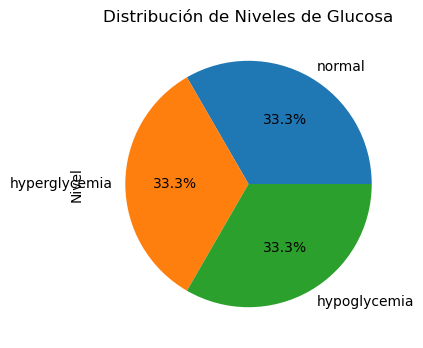

In [16]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [17]:
df_Y_scaled['Nivel'].value_counts()

normal           4011
hyperglycemia    4011
hypoglycemia     4011
Name: Nivel, dtype: int64

<AxesSubplot:>

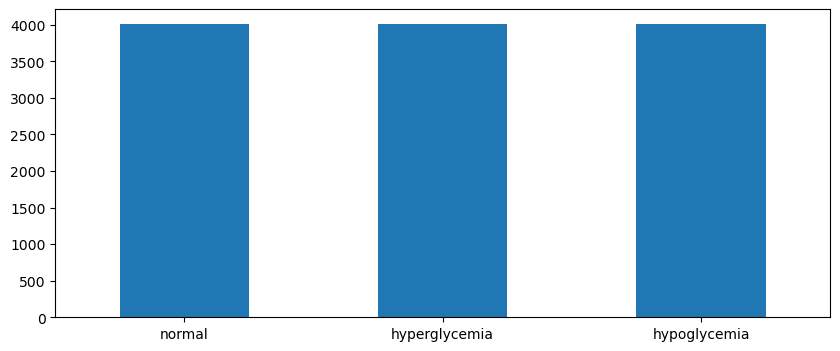

In [20]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [18]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [19]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)